# Telco Customer Churn Analysis

### Import Libraries

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
# Common imports
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

### Load the Data File

In [5]:
data = pd.read_csv("Telco-Customer-Churn.csv")

In [6]:
# Load the top 5 records of the dataset
data.head() 

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [7]:
#No of records and attributes
data.shape 

(7043, 21)

In [8]:
#Attributes
data.columns.values 

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
# Get the summary of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Get the data types of the attributes
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see that the data type of TotalCharges is object, let's convert it to a numerical feature (float).

In [11]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors = 'coerce')

In [12]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Checking for missing values

In [13]:
# Check if there are any missing values in the dataset
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [14]:
# Checking the sum of missing values
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have 11 missing records from TotalCharges.

In [15]:
# Let's view the missing records
data[data['TotalCharges'].isnull() == True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

Since the percentage of the missing records are very low (0.16%), deleting the  missing records won't have an affect on the dataframe.

In [16]:
# Delete the missing records
data.dropna(inplace = True)

In [17]:
# Resetting index after records deletion
data.reset_index()

index  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0         0  7590-VHVEG  Female              0     Yes         No       1   
1         1  5575-GNVDE    Male              0      No         No      34   
2         2  3668-QPYBK    Male              0      No         No       2   
3         3  7795-CFOCW    Male              0      No         No      45   
4         4  9237-HQITU  Female              0      No         No       2   
...     ...         ...     ...            ...     ...        ...     ...   
7027   7038  6840-RESVB    Male              0     Yes        Yes      24   
7028   7039  2234-XADUH  Female              0     Yes        Yes      72   
7029   7040  4801-JZAZL  Female              0     Yes        Yes      11   
7030   7041  8361-LTMKD    Male              1     Yes         No       4   
7031   7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0              No  No phone service             DSL  ...               No   
1             Yes                No             DSL  ...              Yes   
2             Yes                No             DSL  ...               No   
3              No  No phone service             DSL  ...              Yes   
4             Yes                No     Fiber optic  ...               No   
...           ...               ...             ...  ...              ...   
7027          Yes               Yes             DSL  ...              Yes   
7028          Yes               Yes     Fiber optic  ...              Yes   
7029           No  No phone service             DSL  ...               No   
7030          Yes               Yes     Fiber optic  ...               No   
7031          Yes                No     Fiber optic  ...              Yes   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
1             No          No              No        One year               No   
2             No          No              No  Month-to-month              Yes   
3            Yes          No              No        One year               No   
4             No          No              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7027         Yes         Yes             Yes        One year              Yes   
7028          No         Yes             Yes        One year              Yes   
7029          No          No              No  Month-to-month              Yes   
7030          No          No              No  Month-to-month              Yes   
7031         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  
0              Electronic check          29.85        29.85     No  
1                  Mailed check          56.95      1889.50     No  
2                  Mailed check          53.85       108.15    Yes  
3     Bank transfer (automatic)          42.30      1840.75     No  
4              Electronic check          70.70       151.65    Yes  
...                         ...            ...          ...    ...  
7027               Mailed check          84.80      1990.50     No  
7028    Credit card (automatic)         103.20      7362.90     No  
7029           Electronic check          29.60       346.45     No  
7030               Mailed check          74.40       306.60    Yes  
7031  Bank transfer (automatic)         105.65      6844.50     No  

[7032 rows x 22 columns]

In [18]:
# Since we deleted 11 records, we now have only 7032 rows
data.shape

(7032, 21)

In [19]:
# Let's drop 'customerID' because it has no impact on the dataframe
data.drop(['customerID'], axis = 1, inplace = True)
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [20]:
# Get statistical information on numerical variables
data.describe().T

count         mean          std    min       25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

### Variable Analysis

In [21]:
# Renaming the data values of "SeniorCitizen"
senior_column = {0 : "No", 1 : "Yes"}
data["SeniorCitizen"].replace(senior_column, inplace = True)
data.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [22]:
# Get categorical variables
categoricalVar_List = []
for i in data.columns:
    if (data[i].dtypes == 'object'):
        categoricalVar_List.append(i)

print("Categorical Variables : ")
print(categoricalVar_List)

Categorical Variables : 
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [23]:
# Get numerical variables
numericalVar_List = []
for x in data.columns:
    if(data[x].dtypes == 'int64' or data[x].dtypes == 'float64'):
        numericalVar_List.append(x)

print("Numerical Variable : ")
print(numericalVar_List)

Numerical Variable : 
['tenure', 'MonthlyCharges', 'TotalCharges']


In [24]:
# Let's check the number of unique values for each categorical variables
for i in data.columns:
    if (data[i].dtypes == 'object'):
        print("Unique values in", i, "-", data[i].nunique())

Unique values in gender - 2
Unique values in SeniorCitizen - 2
Unique values in Partner - 2
Unique values in Dependents - 2
Unique values in PhoneService - 2
Unique values in MultipleLines - 3
Unique values in InternetService - 3
Unique values in OnlineSecurity - 3
Unique values in OnlineBackup - 3
Unique values in DeviceProtection - 3
Unique values in TechSupport - 3
Unique values in StreamingTV - 3
Unique values in StreamingMovies - 3
Unique values in Contract - 3
Unique values in PaperlessBilling - 2
Unique values in PaymentMethod - 4
Unique values in Churn - 2


In [25]:
# Let's check the number of values for each unique value
for i in data.columns:
    if (data[i].dtypes == 'object'):
        print(i, "\n")
        print(data[i].value_counts(), "\n")

gender 

Male      3549
Female    3483
Name: gender, dtype: int64 

SeniorCitizen 

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64 

Partner 

No     3639
Yes    3393
Name: Partner, dtype: int64 

Dependents 

No     4933
Yes    2099
Name: Dependents, dtype: int64 

PhoneService 

Yes    6352
No      680
Name: PhoneService, dtype: int64 

MultipleLines 

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

InternetService 

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

OnlineSecurity 

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

DeviceProtection 

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype:

In [26]:
# Renaming the data values of "PaymentMethod"
payment_column = {"Electronic check": "E-Check", "Mailed check":"Mailed Check", "Bank transfer (automatic)" : "Bank Transfer", "Credit card (automatic)" : "Credit Card"}
data["PaymentMethod"].replace(payment_column, inplace = True)
data["PaymentMethod"].head()

0          E-Check
1     Mailed Check
2     Mailed Check
3    Bank Transfer
4          E-Check
Name: PaymentMethod, dtype: object

In [27]:
# Created a copy because I don't want to make any changes to the original list
categoricalVar_List_copy = categoricalVar_List.copy()
categoricalVar_List_copy.remove('Churn')

### Distribution of Categorical Features

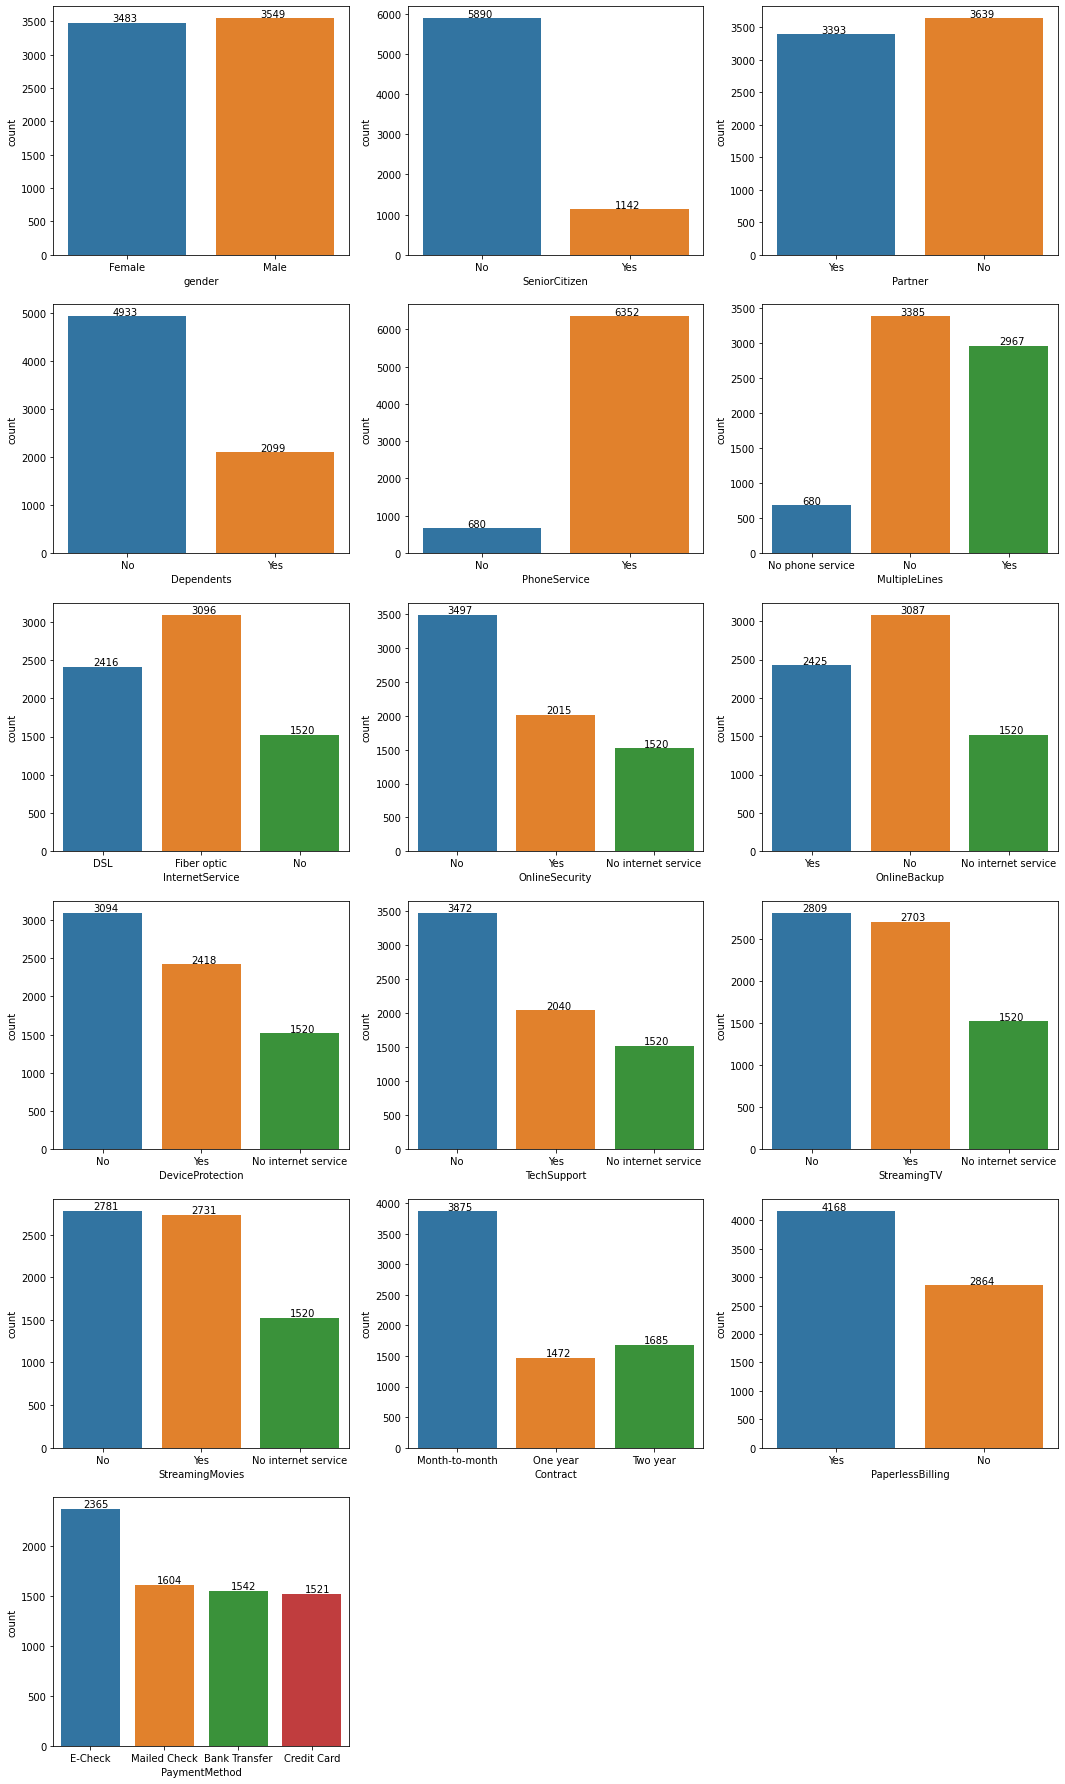

In [28]:
plt.figure(figsize=(18,32))
for i, j in enumerate(categoricalVar_List_copy):
    plt.subplot(6,3, i+1)
    ax = sns.countplot(x = j, data = data)
    # Display the count on the graph
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+20), fontsize = 10)

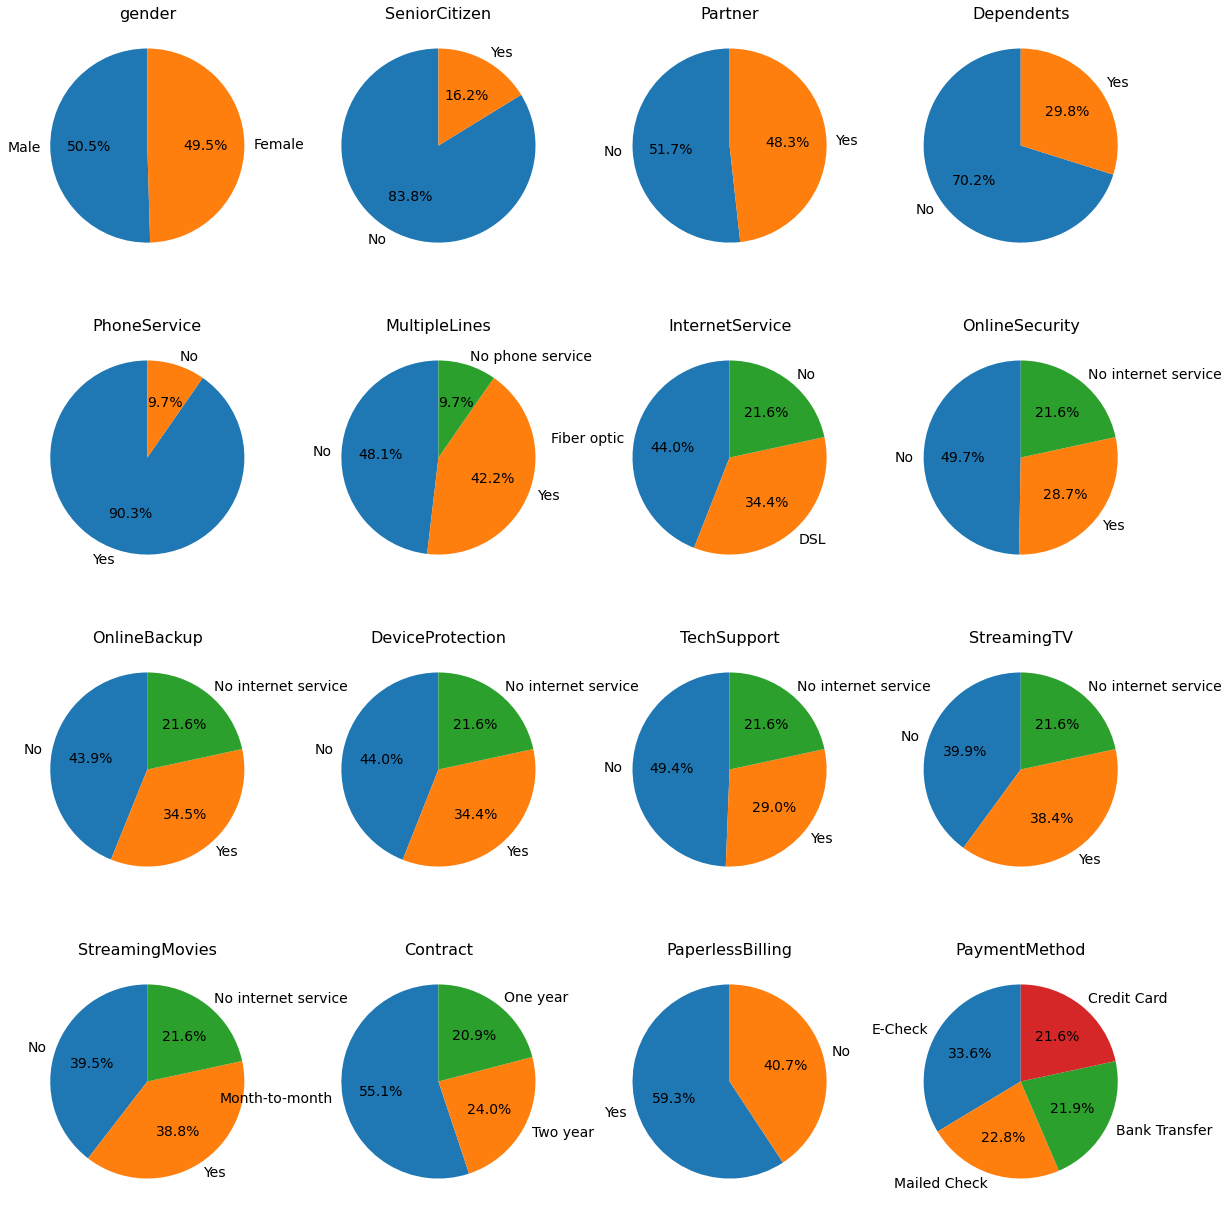

In [29]:
plt.figure(figsize=(20,22))
i = 0
for j in categoricalVar_List_copy:
    plt.subplot(4,4, i+1)
    plt.pie(data[j].value_counts(), labels = data[j].value_counts().index, startangle = 90, autopct='%1.1f%%', textprops={'fontsize' : 14})
    plt.title(f'{j}', fontsize = 16)
    i+=1

### Distribution of Numerical Features

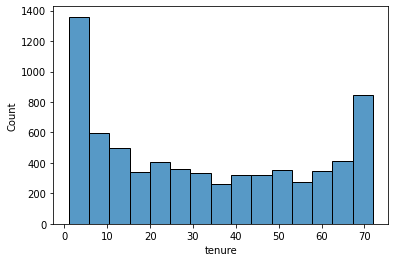

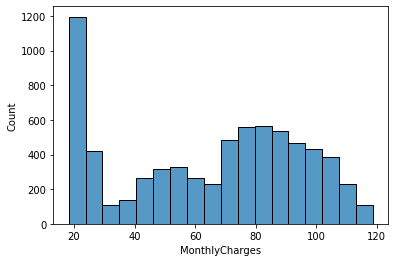

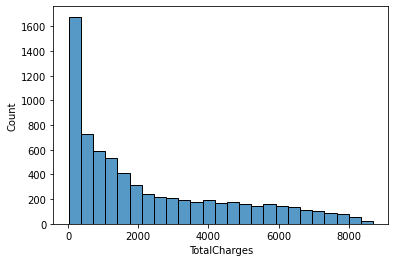

In [30]:
for i, j in enumerate(numericalVar_List):
    plt.figure(i)
    sns.histplot(x = j, data = data)

### Distributon of Target Variable/ Class Attribute

Target Variable/ Class Attribute - Churn

In [31]:
data["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

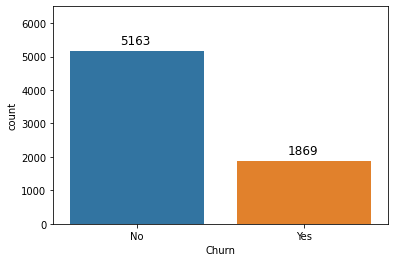

In [32]:
ax = sns.countplot(x = "Churn", data = data)
# y-axis limit
plt.ylim(0, 6500)
# Display the count on the graph
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+200), fontsize = 12)

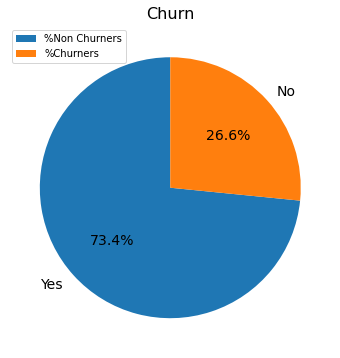

In [33]:
plt.figure(figsize=(8,6))
plt.pie(data["Churn"].value_counts(), labels = ['Yes','No'], startangle = 90, autopct='%1.1f%%', textprops={'fontsize' : 14})
plt.title("Churn", fontsize = 16)
plt.legend(labels = ['%Non Churners', '%Churners'])
plt.show() 

<b><u>Plot insights:</u></b><br>
Non Churners - 73.4%<br>
Churners - 26.6%<br>
Ratio = 73:27<br>
We have a highly imbalanced dataset.

### Distribution of Categorical Features According to 'Churn'

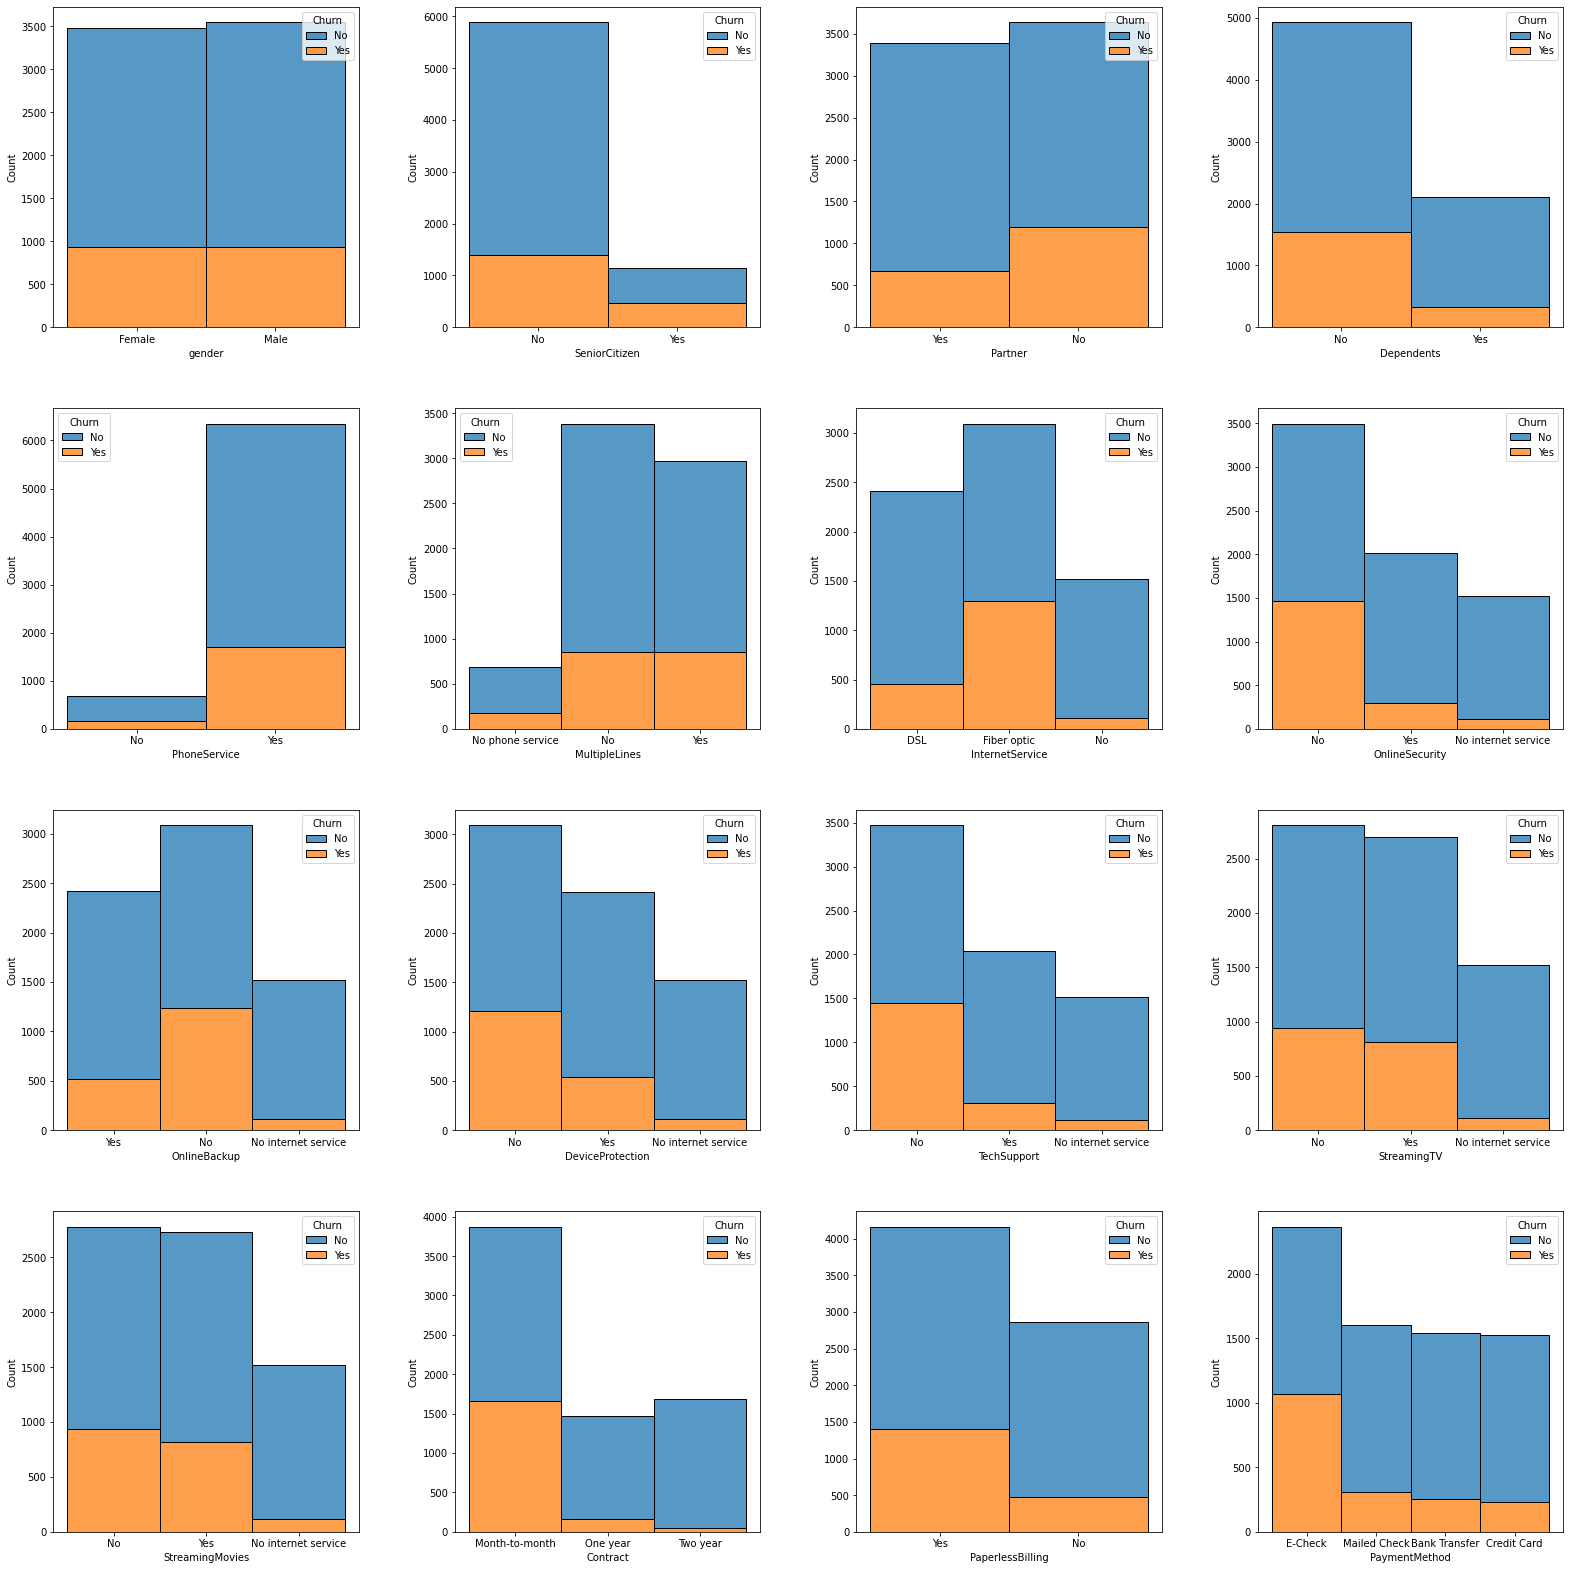

In [34]:
plt.figure(figsize = (23,23))
for i, j in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.subplot(4,4,i + 1)
    ax = sns.histplot(x = j, hue = 'Churn', data = data, multiple = "stack")
    plt.tight_layout(pad = 5.0)

<b><u>Plot insights:</u></b>
<li> Both genders have an equal churn rate.</li>
<li> Churn rate of Non Senior Citizens are much higher.</li>
<li> Single customers are more likely to churn than customers with partners.</li>
<li> Customers without any dependents are most likely to churn than customers with dependents.</li>
<li> High churn rate for customers with Phone Service.</li>
<li> Equal churn rate for customers with or without Multiple Lines.</li>
<li> Customers with Fiber Optic Internet Service has a high churn rate when compared to DSL and No Internet Service customers. This might suggest a dissatisfaction with this type of internet service.</li>
<li> Customers without Online Security are most likely to churn.</li>
<li> Customers without Online Backup are most likely to churn.</li>
<li> Customers without Device Protection are most likely to churn.</li>
<li> Customers without Tech Support has a higher churn rate.</li>
<li> Customers without Streaming TV service are most likely to churn.</li>
<li> Customers without Streaming Movies service are most likely to churn.</li>
<li> Notably higher churn rate can be seen from customers with Month-to-Month Contracts. </li>
<li> Customers with Paperless Billing are most likely to churn.</li>
<li> Electronic Check Payment method has a high churn rate than other payment methods.</li>

### Distribution of Numerical Features According to 'Churn'

#### Tenure

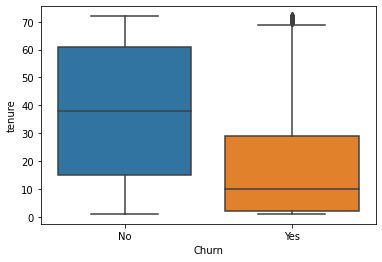

In [35]:
ax = sns.boxplot(x = data["Churn"], y = data["tenure"], data = data)

<b><u>Plot insights:</u></b>
<li>Churning customers have much lower tenure (median of ca. 10 months) compared to non-churners (median of ca. 38 months).</li>
<li>New customers are most likely to churn.</li>

#### Monthly Charges

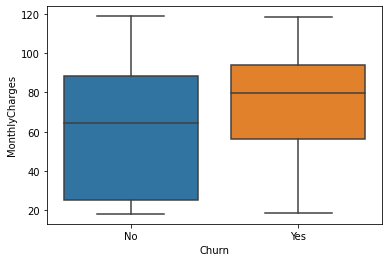

In [36]:
ax = sns.boxplot(x = data["Churn"], y = data["MonthlyCharges"], data = data)

<b><u>Plot insights:</u></b>
<li>Churning customers have higher monthly charges (median of ca. 80 USD) compared to that of non-churners (median of ca. 65 USD).</li>

#### Total Charges

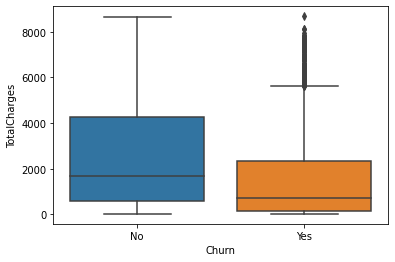

In [37]:
ax = sns.boxplot(x = data["Churn"], y = data["TotalCharges"], data = data)

<b><u>Plot insights:</u></b>
<li>Surprisingly churn rate is higher when Total Charges are lower.</li>

<b><u>Conclusion:</u></b><br>
TotalCharges is calculated using tenure and MonthlyCharges.
TotalCharges = tenure * MonthlyCharges

So when we compare the insights of the 3 numerical features => high MonthlyCharge at low tenure, results a low TotalCharge. Therefore, <b>High MonthlyCharge</b>, <b>Low tenure</b>, and <b>Low TotalCharge</b> results a <b>High Churn Rate</b>.


### Data Binning - Tenure Attribute

In [38]:
data["tenure"].nunique()

72

The tenure attribute has 72 unique values. So analyzing the data on the tenure attribute can be hectic due to the large number of records. Therefore, to gain a clear insight of the tenure attribute let's divide it into bins.

In [39]:
# Let's make a copy of our dataframe and make changes to the copied dataframe
data_copy = data.copy()

In [40]:
# Get the maximum tenure - 72 months
print(data_copy['tenure'].max())

72


In [41]:
# Grouping the tenure in bins of 12 months - equal width binning
labels = ["{0} - {1}".format(i, i + 12) for i in range(0, 72, 12)]
bins = [*range(0,73,12)] # * argument unpacking operator
print(labels)
print(bins)
data_copy['Tenure Period'] = pd.cut(data_copy["tenure"], bins = bins, labels = labels)

['0 - 12', '12 - 24', '24 - 36', '36 - 48', '48 - 60', '60 - 72']
[0, 12, 24, 36, 48, 60, 72]


In [42]:
data_copy['Tenure Period'].value_counts()

0 - 12     2175
60 - 72    1407
12 - 24    1024
24 - 36     832
48 - 60     832
36 - 48     762
Name: Tenure Period, dtype: int64

In [43]:
# Remove tenure attribute
data_copy.drop(columns = ['tenure'], axis = 1, inplace = True)
data_copy.tail()

gender SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
7038    Male            No     Yes        Yes          Yes               Yes   
7039  Female            No     Yes        Yes          Yes               Yes   
7040  Female            No     Yes        Yes           No  No phone service   
7041    Male           Yes     Yes         No          Yes               Yes   
7042    Male            No      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

      PaymentMethod  MonthlyCharges  TotalCharges Churn Tenure Period  
7038   Mailed Check           84.80       1990.50    No       12 - 24  
7039    Credit Card          103.20       7362.90    No       60 - 72  
7040        E-Check           29.60        346.45    No        0 - 12  
7041   Mailed Check           74.40        306.60   Yes        0 - 12  
7042  Bank Transfer          105.65       6844.50    No       60 - 72

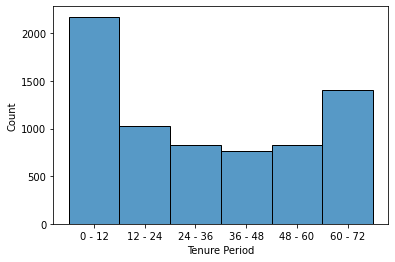

In [44]:
ax = sns.histplot(x = data_copy['Tenure Period'], data = data)

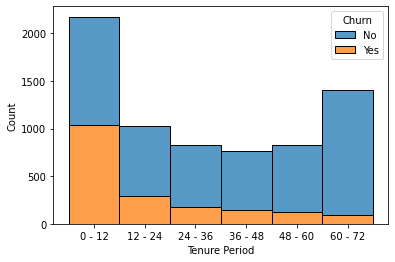

In [45]:
ax = sns.histplot(x = data_copy["Tenure Period"], hue = 'Churn', data = data_copy, multiple = "stack")

<b><u>Plot insights:</u></b><br>
Majority of the customers who had been a customer for a year or less churned. High churn rate within the first year suggests that the service offered does not meet the expectations of the new customers.

In [46]:
# Convert Churn to a binary numerical variable (Yes = 1 No = 0)
churn_column = {"No" : 0, "Yes" : 1}
data_copy["Churn"].replace(churn_column, inplace = True)
data_copy.head()

gender SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female            No     Yes         No           No  No phone service   
1    Male            No      No         No          Yes                No   
2    Male            No      No         No          Yes                No   
3    Male            No      No         No           No  No phone service   
4  Female            No      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  PaymentMethod  \
0          No              No  Month-to-month              Yes        E-Check   
1          No              No        One year               No   Mailed Check   
2          No              No  Month-to-month              Yes   Mailed Check   
3          No              No        One year               No  Bank Transfer   
4          No              No  Month-to-month              Yes        E-Check   

   MonthlyCharges  TotalCharges  Churn Tenure Period  
0           29.85         29.85      0        0 - 12  
1           56.95       1889.50      0       24 - 36  
2           53.85        108.15      1        0 - 12  
3           42.30       1840.75      0       36 - 48  
4           70.70        151.65      1        0 - 12

#### Convert categorical variable to numerical variables

In [47]:
gender_column = {"Female" : 0, "Male" : 1}
data_copy["gender"].replace(gender_column, inplace = True)

yesNo_list = ["SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for i in yesNo_list:
    yn_column = {"No" : 0, "Yes" : 1}
    data_copy[i].replace(yn_column, inplace = True)

data_copy.head()

gender  SeniorCitizen  Partner  Dependents  PhoneService     MultipleLines  \
0       0              0        1           0             0  No phone service   
1       1              0        0           0             1                No   
2       1              0        0           0             1                No   
3       1              0        0           0             0  No phone service   
4       0              0        0           0             1                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract  PaperlessBilling  \
0          No              No  Month-to-month                 1   
1          No              No        One year                 0   
2          No              No  Month-to-month                 1   
3          No              No        One year                 0   
4          No              No  Month-to-month                 1   

   PaymentMethod  MonthlyCharges  TotalCharges  Churn Tenure Period  
0        E-Check           29.85         29.85      0        0 - 12  
1   Mailed Check           56.95       1889.50      0       24 - 36  
2   Mailed Check           53.85        108.15      1        0 - 12  
3  Bank Transfer           42.30       1840.75      0       36 - 48  
4        E-Check           70.70        151.65      1        0 - 12

### One-Hot Encoding - Using Pandas get_dummies function

In [48]:
# Converting remaining categorical variables into dummy variables
data_copy = pd.get_dummies(data_copy)
data_copy.head()

gender  SeniorCitizen  Partner  Dependents  PhoneService  PaperlessBilling  \
0       0              0        1           0             0                 1   
1       1              0        0           0             1                 0   
2       1              0        0           0             1                 1   
3       1              0        0           0             0                 0   
4       0              0        0           0             1                 1   

   MonthlyCharges  TotalCharges  Churn  MultipleLines_No  ...  \
0           29.85         29.85      0                 0  ...   
1           56.95       1889.50      0                 1  ...   
2           53.85        108.15      1                 1  ...   
3           42.30       1840.75      0                 0  ...   
4           70.70        151.65      1                 1  ...   

   PaymentMethod_Bank Transfer  PaymentMethod_Credit Card  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            1                          0   
4                            0                          0   

   PaymentMethod_E-Check  PaymentMethod_Mailed Check  Tenure Period_0 - 12  \
0                      1                           0                     1   
1                      0                           1                     0   
2                      0                           1                     1   
3                      0                           0                     0   
4                      1                           0                     1   

   Tenure Period_12 - 24  Tenure Period_24 - 36  Tenure Period_36 - 48  \
0                      0                      0                      0   
1                      0                      1                      0   
2                      0                      0                      0   
3                      0                      0                      1   
4                      0                      0                      0   

   Tenure Period_48 - 60  Tenure Period_60 - 72  
0                      0                      0  
1                      0                      0  
2                      0                      0  
3                      0                      0  
4                      0                      0  

[5 rows x 46 columns]

In [49]:
# Now we will look at the correlation of all the attribuites with the expected class attribuite (Churn)
corr_matrix = data_copy.corr()
corr_Churn = corr_matrix["Churn"].sort_values(ascending = False)
corr_Churn

Churn                                   1.000000
Contract_Month-to-month                 0.404565
OnlineSecurity_No                       0.342235
TechSupport_No                          0.336877
Tenure Period_0 - 12                    0.319628
InternetService_Fiber optic             0.307463
PaymentMethod_E-Check                   0.301455
OnlineBackup_No                         0.267595
DeviceProtection_No                     0.252056
MonthlyCharges                          0.192858
PaperlessBilling                        0.191454
SeniorCitizen                           0.150541
StreamingMovies_No                      0.130920
StreamingTV_No                          0.128435
StreamingTV_Yes                         0.063254
StreamingMovies_Yes                     0.060860
MultipleLines_Yes                       0.040033
Tenure Period_12 - 24                   0.019929
PhoneService                            0.011691
gender                                 -0.008545
MultipleLines_No pho

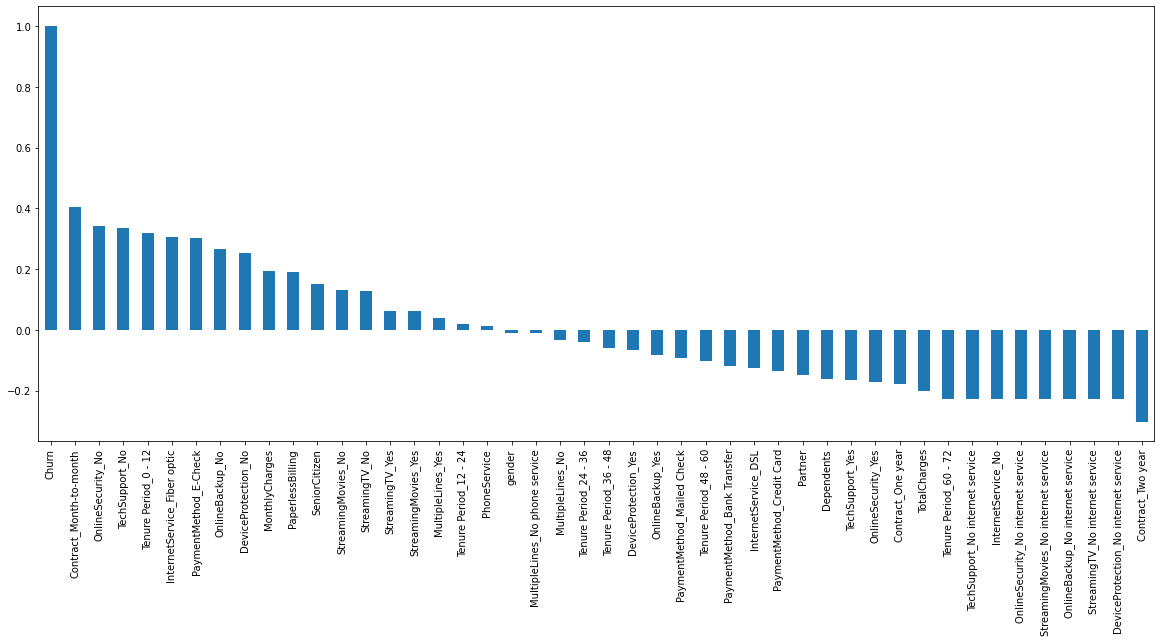

In [50]:
plt.figure(figsize=(20,8))
ax = corr_Churn.plot(kind='bar')

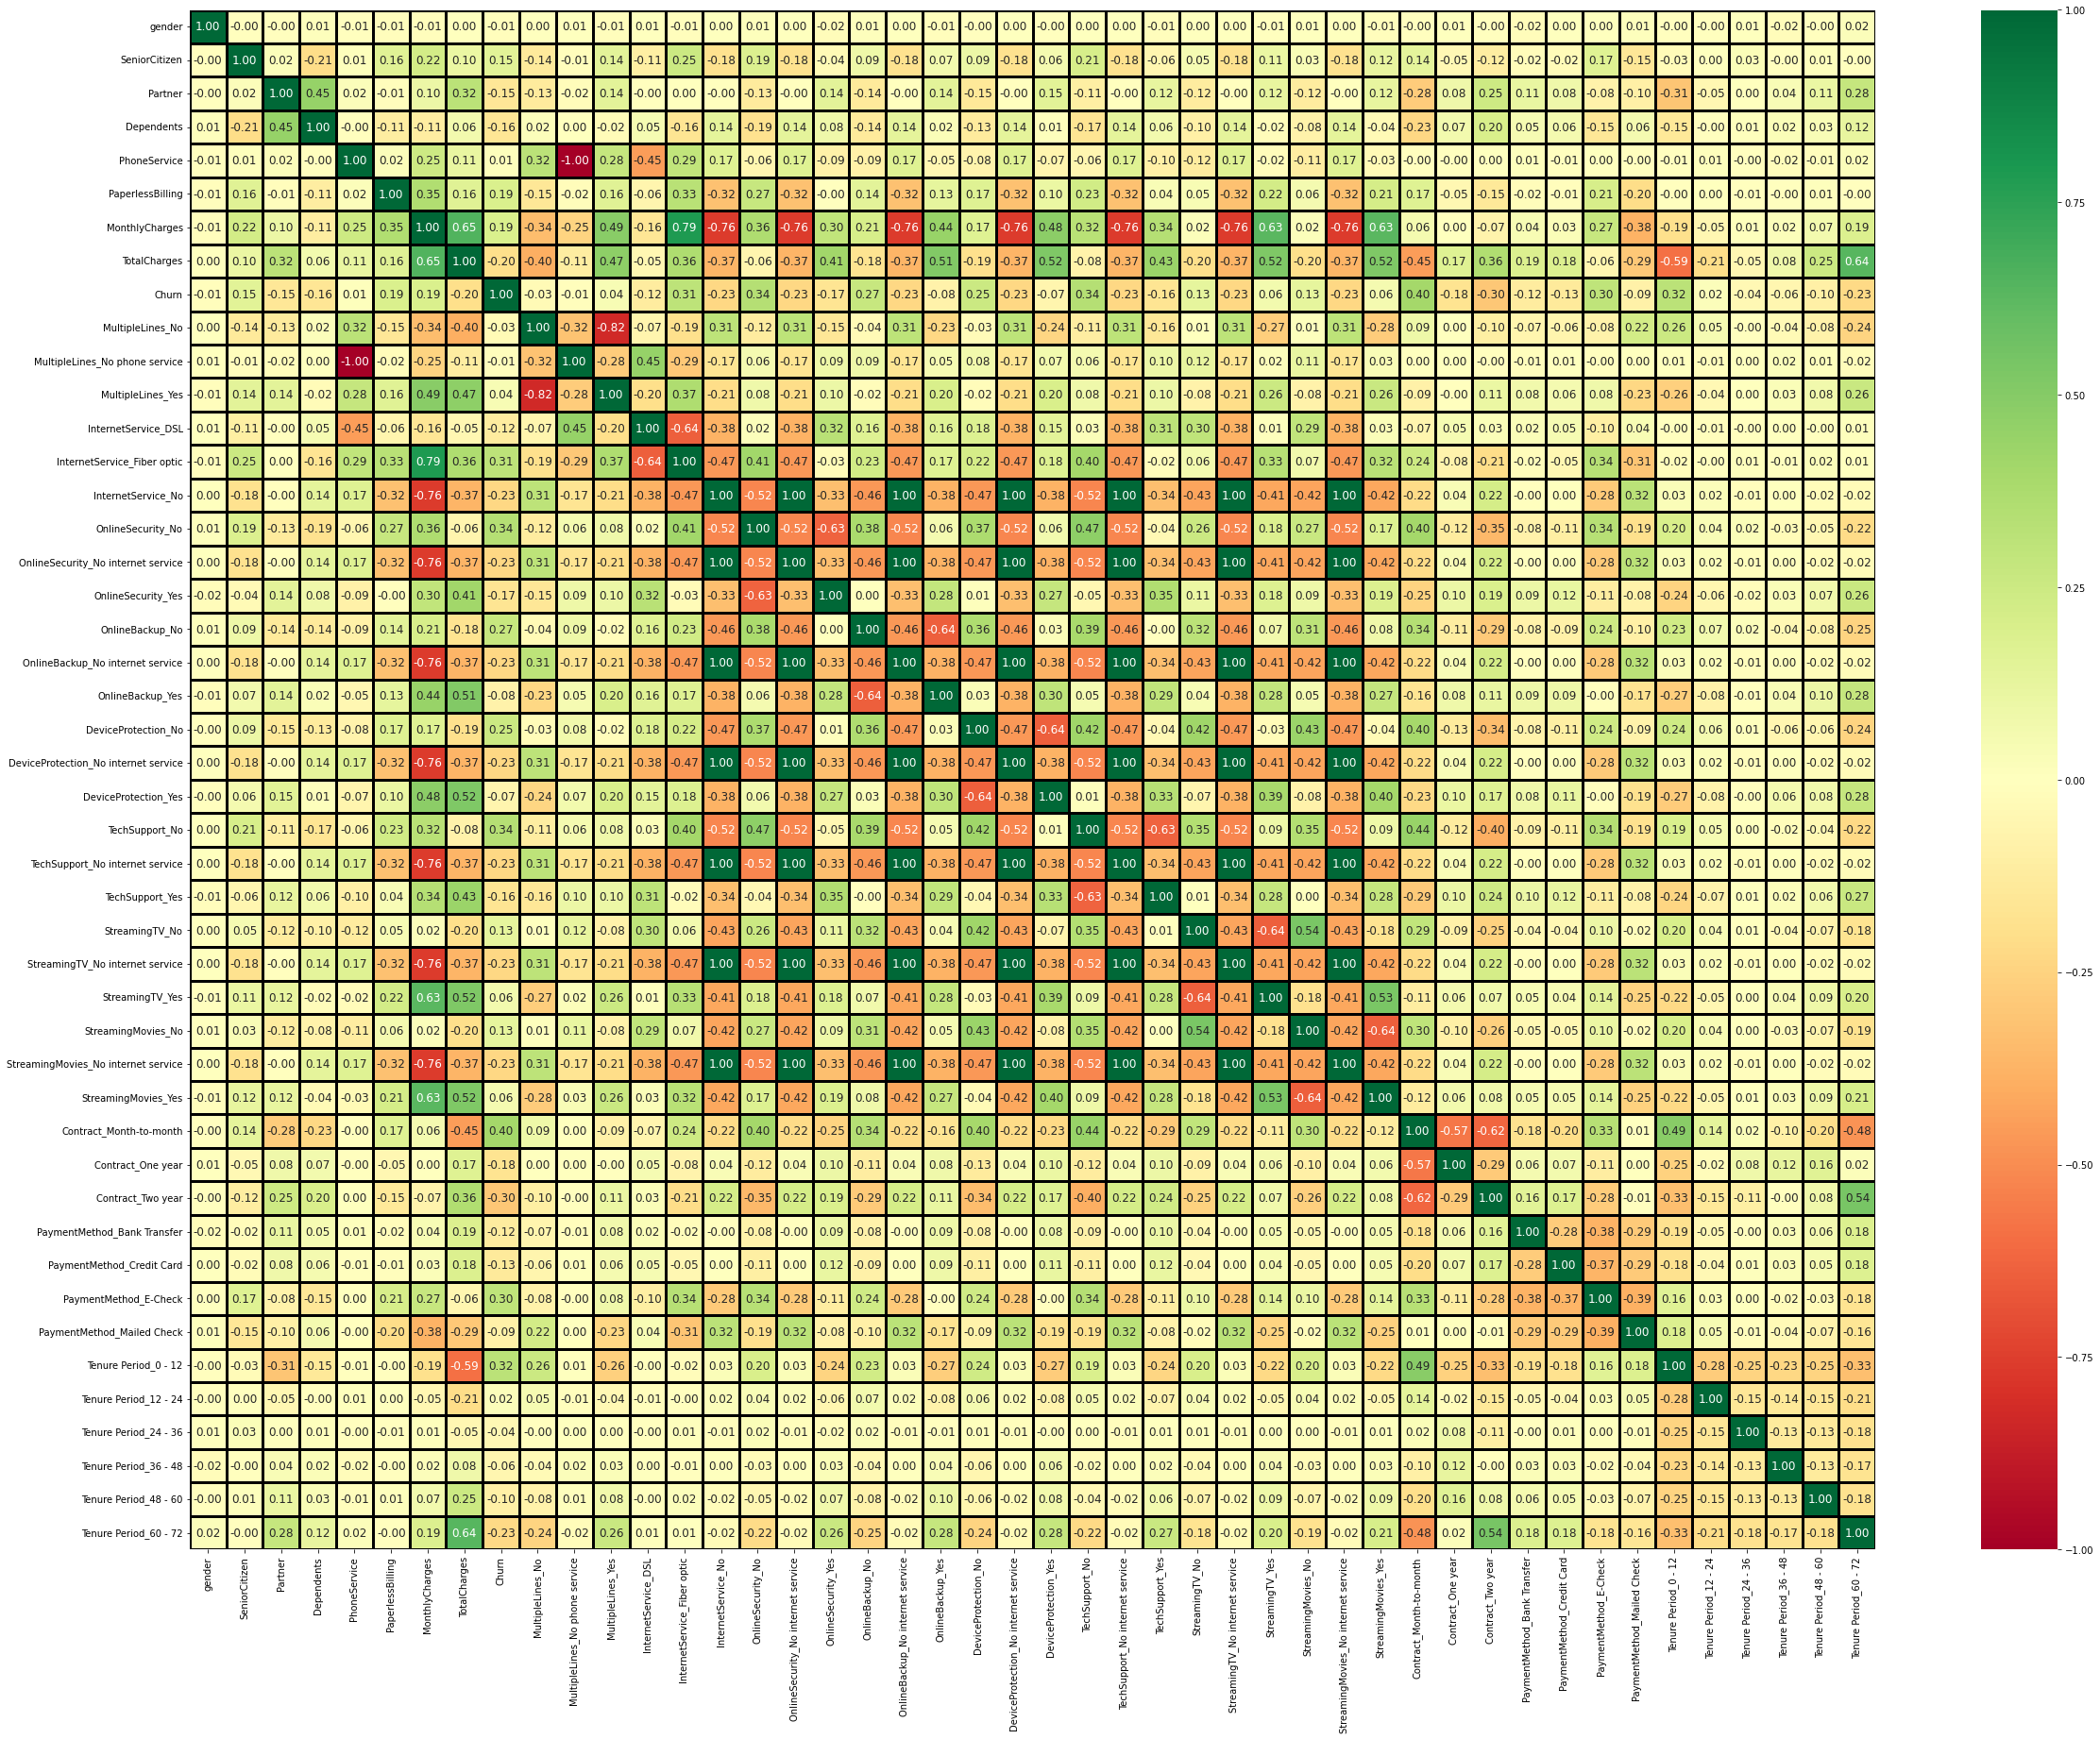

In [51]:
plt.figure(figsize = (40, 30))
ax = sns.heatmap(corr_matrix, annot = True, fmt='.2f', cmap="RdYlGn", linewidths = 3, linecolor = 'black', annot_kws={'size': 12})

<b><u>Plot Insight:</u></b>
<li><b>High Churn</b> - Month to month contracts, No online security, No Tech support, First year of subscriptions (Tenure period 0-12), Fibre Optics Internet, and Electronic Check Payments. </li>

<li><b>Low Churn</b> - 2-year contracts, Subscriptions without internet service, and 5-6 years customers.</li>

<li>Factors with No impact on Churn - Gender, Availability of PhoneService, and number of multiple lines.</li>

## Task 3 - Naïve Bayes Classifier 

In [52]:
X = data_copy.drop("Churn", axis = 1)
y = data_copy["Churn"]

#### Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

# Splitting dataset into train set and test set, 70/30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4922, 45) (4922,)
(2110, 45) (2110,)


The Complement Naive Bayes classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.

In [54]:
from sklearn.naive_bayes import ComplementNB

classifier = ComplementNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

#from sklearn.naive_bayes import MultinomialNB
#nb = MultinomialNB()
#nb.fit(X_train, y_train)
#y_pred = nb.predict(X_test)

### Performance Measures

#### Accuracy 

In [55]:
from sklearn.metrics import accuracy_score

# ComplementNB
print(accuracy_score(y_test, prediction))

# MultinomialNB
#print(accuracy_score(y_test, y_pred))

0.6630331753554503


#### Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix

# ComplementNB

con_matrix = confusion_matrix(y_test, prediction)

TP = con_matrix[0][0]
FP = con_matrix[0][1]
FN = con_matrix[1][0]
TN = con_matrix[1][1]

TPR = TP / (TP + FN)
FPR = FN / (FN + TP)

print("Confusion Matrix - ")
print(con_matrix)
print("---------------------------")
print("According to ComplementNB Confusion Matrix")
print("---------------------------")
print("True Positives (TP) - " , TP)
print("False Positives (FP) - " , FP)
print("False Negatives (FN) - " , FN)
print("True Negatives (TN)- " , TN)
print("---------------------------")
print("True Positive Rate (TPR)- ", "{:.2f}".format(TPR))
print("False Positive Rate (FPR) - ", "{:.2f}".format(FPR))
print("---------------------------")



# MultinomialNB
#cm = confusion_matrix(y_test, y_pred)

#TP =  cm[0][0]
#FP = cm[0][1]
#FN = cm[1][0]
#TN = cm[1][1]

#TPR = TP / (TP + FN)
#FPR = FN / (FN + TP)

#print("Confusion Matrix - ")
#print(cm)
#print("---------------------------")
#print("According to MultinomialNB Confusion Matrix")
#print("---------------------------")
#print("---------------------------") 
#print("True Positives (TP) - " , TP)
#print("False Positives (FP) - " , FP)
#print("False Negatives (FN) - " , FN)
#print("True Negatives (TN) - " , TN)
#print("---------------------------")
#print("True Positive Rate (TPR)- ", "{:.2f}".format(TPR))
#print("False Positive Rate (FPR) - ", "{:.2f}".format(FPR))
#print("---------------------------")


Confusion Matrix - 
[[976 573]
 [138 423]]
---------------------------
According to ComplementNB Confusion Matrix
---------------------------
True Positives (TP) -  976
False Positives (FP) -  573
False Negatives (FN) -  138
True Negatives (TN)-  423
---------------------------
True Positive Rate (TPR)-  0.88
False Positive Rate (FPR) -  0.12
---------------------------


#### Precision, recall, f1-score

In [57]:
from sklearn.metrics import classification_report

# ComplementNB
print(classification_report(y_test, prediction))

# MultinomialNB
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.63      0.73      1549
           1       0.42      0.75      0.54       561

    accuracy                           0.66      2110
   macro avg       0.65      0.69      0.64      2110
weighted avg       0.76      0.66      0.68      2110



Precision is the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes.
<br>
Recall is the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.


<b><u>Observation</u></b>
<li>Classifier is better to find <b>class 0</b> over <b>class 1</b></li>

## Task 4 - Feature Selection

In [58]:
# Pearson correlation coefficient
corr = data_copy.corr()["Churn"].sort_values(ascending = False)
#corr

# absolute for positive values
abs_corr = abs(corr)
abs_corr.sort_values(ascending = False)

Churn                                   1.000000
Contract_Month-to-month                 0.404565
OnlineSecurity_No                       0.342235
TechSupport_No                          0.336877
Tenure Period_0 - 12                    0.319628
InternetService_Fiber optic             0.307463
Contract_Two year                       0.301552
PaymentMethod_E-Check                   0.301455
OnlineBackup_No                         0.267595
DeviceProtection_No                     0.252056
StreamingTV_No internet service         0.227578
InternetService_No                      0.227578
OnlineSecurity_No internet service      0.227578
StreamingMovies_No internet service     0.227578
OnlineBackup_No internet service        0.227578
TechSupport_No internet service         0.227578
DeviceProtection_No internet service    0.227578
Tenure Period_60 - 72                   0.226078
TotalCharges                            0.199484
MonthlyCharges                          0.192858
PaperlessBilling    

#### Top 2 Features

In [59]:
# Top 2 features
# random threshold for features to keep
relevant_features_2 = abs_corr[abs_corr > 0.34]
relevant_features_2.sort_values(ascending = False)

Churn                      1.000000
Contract_Month-to-month    0.404565
OnlineSecurity_No          0.342235
Name: Churn, dtype: float64

We can see that the top 2 features w.r.t "Churn" based on absolute values of the corelation are Contract_Month-to-month and OnlineSecurity_No. Therefore, let's drop other features apart from these two.

In [60]:
# Data Set 1 - Top 2 features
dataset1 = data_copy[["Contract_Month-to-month","OnlineSecurity_No","Churn"]]
dataset1.head()

Contract_Month-to-month  OnlineSecurity_No  Churn
0                        1                  1      0
1                        0                  0      0
2                        1                  0      1
3                        0                  0      0
4                        1                  1      1

In [61]:
# Let's check the correlation of the selected features with each other
# The features should be uncorrelated with each other
# If they are correlated then we need to keep only one and drop the other
corr_top2 = dataset1.corr()
corr_top2 #Features aren't higlhy correlated

Contract_Month-to-month  OnlineSecurity_No     Churn
Contract_Month-to-month                 1.000000           0.402548  0.404565
OnlineSecurity_No                       0.402548           1.000000  0.342235
Churn                                   0.404565           0.342235  1.000000

#### Top 5 Features

In [62]:
# Top 5 features
# random threshold for features to keep
relevant_features_5 = abs_corr[abs_corr > 0.307]
relevant_features_5.sort_values(ascending = False)

Churn                          1.000000
Contract_Month-to-month        0.404565
OnlineSecurity_No              0.342235
TechSupport_No                 0.336877
Tenure Period_0 - 12           0.319628
InternetService_Fiber optic    0.307463
Name: Churn, dtype: float64

We can see that the top 5 features w.r.t "Churn" based on absolute values of the corelation are Contract_Month-to-month and OnlineSecurity_No, TechSupport_No,Tenure Period_0 - 12, and InternetService_Fiber optic. Therefore, let's drop other features apart from these.

In [63]:
# Data Set 2 - Top 5 features
dataset2 = data_copy[["Contract_Month-to-month","OnlineSecurity_No","TechSupport_No","Tenure Period_0 - 12","InternetService_Fiber optic", "Churn"]]
dataset2.head()

Contract_Month-to-month  OnlineSecurity_No  TechSupport_No  \
0                        1                  1               1   
1                        0                  0               1   
2                        1                  0               1   
3                        0                  0               0   
4                        1                  1               1   

   Tenure Period_0 - 12  InternetService_Fiber optic  Churn  
0                     1                            0      0  
1                     0                            0      0  
2                     1                            0      1  
3                     0                            0      0  
4                     1                            1      1

In [64]:
# Now let's check the correlation among the selected features
# If any of these are hoghly correlated with each other let's drop one
corr_top5 = dataset2.corr()
corr_top5 #Here none of the features are highly correlated

Contract_Month-to-month  OnlineSecurity_No  \
Contract_Month-to-month                     1.000000           0.402548   
OnlineSecurity_No                           0.402548           1.000000   
TechSupport_No                              0.438473           0.470113   
Tenure Period_0 - 12                        0.492052           0.196529   
InternetService_Fiber optic                 0.243014           0.411006   
Churn                                       0.404565           0.342235   

                             TechSupport_No  Tenure Period_0 - 12  \
Contract_Month-to-month            0.438473              0.492052   
OnlineSecurity_No                  0.470113              0.196529   
TechSupport_No                     1.000000              0.193915   
Tenure Period_0 - 12               0.193915              1.000000   
InternetService_Fiber optic        0.401869             -0.021441   
Churn                              0.336877              0.319628   

                             InternetService_Fiber optic     Churn  
Contract_Month-to-month                         0.243014  0.404565  
OnlineSecurity_No                               0.411006  0.342235  
TechSupport_No                                  0.401869  0.336877  
Tenure Period_0 - 12                           -0.021441  0.319628  
InternetService_Fiber optic                     1.000000  0.307463  
Churn                                           0.307463  1.000000

#### Top 10 Features

In [65]:
# Top 10 features
# random threshold for features to keep
relevant_features_10 = abs_corr[abs_corr > 0.25]
relevant_features_10.sort_values(ascending = False)

Churn                          1.000000
Contract_Month-to-month        0.404565
OnlineSecurity_No              0.342235
TechSupport_No                 0.336877
Tenure Period_0 - 12           0.319628
InternetService_Fiber optic    0.307463
Contract_Two year              0.301552
PaymentMethod_E-Check          0.301455
OnlineBackup_No                0.267595
DeviceProtection_No            0.252056
Name: Churn, dtype: float64

In [66]:
# Data Set 3 - Top 10 features
dataset3 = data_copy[["Contract_Month-to-month","OnlineSecurity_No","TechSupport_No","Tenure Period_0 - 12","InternetService_Fiber optic","Contract_Two year","PaymentMethod_E-Check","OnlineBackup_No","DeviceProtection_No","Churn"]]
dataset3.head()

Contract_Month-to-month  OnlineSecurity_No  TechSupport_No  \
0                        1                  1               1   
1                        0                  0               1   
2                        1                  0               1   
3                        0                  0               0   
4                        1                  1               1   

   Tenure Period_0 - 12  InternetService_Fiber optic  Contract_Two year  \
0                     1                            0                  0   
1                     0                            0                  0   
2                     1                            0                  0   
3                     0                            0                  0   
4                     1                            1                  0   

   PaymentMethod_E-Check  OnlineBackup_No  DeviceProtection_No  Churn  
0                      1                0                    1      0  
1                      0                1                    0      0  
2                      0                0                    1      1  
3                      0                1                    0      0  
4                      1                1                    1      1

In [67]:
# Now let's check the correlation among the selected features
# If any of these are hoghly correlated with each other let's drop one
corr_top10 = dataset3.corr()
corr_top10

Contract_Month-to-month  OnlineSecurity_No  \
Contract_Month-to-month                     1.000000           0.402548   
OnlineSecurity_No                           0.402548           1.000000   
TechSupport_No                              0.438473           0.470113   
Tenure Period_0 - 12                        0.492052           0.196529   
InternetService_Fiber optic                 0.243014           0.411006   
Contract_Two year                          -0.621933          -0.352447   
PaymentMethod_E-Check                       0.330879           0.335854   
OnlineBackup_No                             0.338126           0.378167   
DeviceProtection_No                         0.396876           0.371496   
Churn                                       0.404565           0.342235   

                             TechSupport_No  Tenure Period_0 - 12  \
Contract_Month-to-month            0.438473              0.492052   
OnlineSecurity_No                  0.470113              0.196529   
TechSupport_No                     1.000000              0.193915   
Tenure Period_0 - 12               0.193915              1.000000   
InternetService_Fiber optic        0.401869             -0.021441   
Contract_Two year                 -0.397788             -0.333850   
PaymentMethod_E-Check              0.338529              0.160530   
OnlineBackup_No                    0.385055              0.233228   
DeviceProtection_No                0.419653              0.239267   
Churn                              0.336877              0.319628   

                             InternetService_Fiber optic  Contract_Two year  \
Contract_Month-to-month                         0.243014          -0.621933   
OnlineSecurity_No                               0.411006          -0.352447   
TechSupport_No                                  0.401869          -0.397788   
Tenure Period_0 - 12                           -0.021441          -0.333850   
InternetService_Fiber optic                     1.000000          -0.209965   
Contract_Two year                              -0.209965           1.000000   
PaymentMethod_E-Check                           0.335763          -0.281147   
OnlineBackup_No                                 0.227363          -0.287128   
DeviceProtection_No                             0.217449          -0.338520   
Churn                                           0.307463          -0.301552   

                             PaymentMethod_E-Check  OnlineBackup_No  \
Contract_Month-to-month                   0.330879         0.338126   
OnlineSecurity_No                         0.335854         0.378167   
TechSupport_No                            0.338529         0.385055   
Tenure Period_0 - 12                      0.160530         0.233228   
InternetService_Fiber optic               0.335763         0.227363   
Contract_Two year                        -0.281147        -0.287128   
PaymentMethod_E-Check                     1.000000         0.236414   
OnlineBackup_No                           0.236414         1.000000   
DeviceProtection_No                       0.239173         0.361238   
Churn                                     0.301455         0.267595   

                             DeviceProtection_No     Churn  
Contract_Month-to-month                 0.396876  0.404565  
OnlineSecurity_No                       0.371496  0.342235  
TechSupport_No                          0.419653  0.336877  
Tenure Period_0 - 12                    0.239267  0.319628  
InternetService_Fiber optic             0.217449  0.307463  
Contract_Two year                      -0.338520 -0.301552  
PaymentMethod_E-Check                   0.239173  0.301455  
OnlineBackup_No                         0.361238  0.267595  
DeviceProtection_No                     1.000000  0.252056  
Churn                                   0.252056  1.000000

We can see that only Contract_Month-to-month, and Contract_Two year are highly correlated (-0.621933). So we have to select one and drop the other.<br>
Let's keep Contract_Month-to-month since its correlation with Churn is higher than that of Contract_Two year.

In [68]:
dataset3 = dataset3.drop("Contract_Two year", axis = 1)
dataset3.head()

Contract_Month-to-month  OnlineSecurity_No  TechSupport_No  \
0                        1                  1               1   
1                        0                  0               1   
2                        1                  0               1   
3                        0                  0               0   
4                        1                  1               1   

   Tenure Period_0 - 12  InternetService_Fiber optic  PaymentMethod_E-Check  \
0                     1                            0                      1   
1                     0                            0                      0   
2                     1                            0                      0   
3                     0                            0                      0   
4                     1                            1                      1   

   OnlineBackup_No  DeviceProtection_No  Churn  
0                0                    1      0  
1                1                    0      0  
2                0                    1      1  
3                1                    0      0  
4                1                    1      1

## Task 5 - Run Naïve Bayes Classifier on the 3 Data Sets

In [69]:
# Function to run naive bayes on the 3 datasets
def naive_bayes(X,Y):
    
    # Splitting dataset into train set and test set, 70/30 train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
    
    # training model using naive bayes - ComplementNB() 
    classifier = ComplementNB()
    classifier.fit(X_train, y_train)
    
    # testing the model, getting prediction
    prediction = classifier.predict(X_test)
    
    con_matrix = confusion_matrix(y_test, prediction)
    
    TP = con_matrix[0][0]
    FP = con_matrix[0][1]
    FN = con_matrix[1][0]
    TN = con_matrix[1][1]

    TPR = TP / (TP + FN)
    FPR = FN / (FN + TP)
    
    print("-----------------------------------------------------")
    print("ComplementNB")
    print("-----------------------------------------------------")
    print("Accuracy:", accuracy_score(y_test, prediction))
    print("-----------------------------------------------------")
    print(classification_report(y_test, prediction))
    print("-----------------------------------------------------")
    print("Confusion Matrix - ")
    print("")
    print(con_matrix)
    print("-----------------------------------------------------")
    print("According to ComplementNB Confusion Matrix - ")
    print("")
    print("True Positives (TP) - " , TP)
    print("False Positives (FP) - " , FP)
    print("False Negatives (FN) - " , FN)
    print("True Negatives (TN) - " , TN)
    print("-----------------------------------------------------")
    print("True Positive Rate (TPR)- ", "{:.2f}".format(TPR))
    print("False Positive Rate (FPR) - ", "{:.2f}".format(FPR))
    print("-----------------------------------------------------")

#### Naïve Bayes on Top 2 Features Data Set

In [70]:
X2 = dataset1.drop("Churn",axis = 1)
y2 = dataset1["Churn"]

naive_bayes(X2,y2)

-----------------------------------------------------
ComplementNB
-----------------------------------------------------
Accuracy: 0.6507109004739337
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.82      0.78      1549
           1       0.26      0.17      0.21       561

    accuracy                           0.65      2110
   macro avg       0.50      0.50      0.49      2110
weighted avg       0.61      0.65      0.63      2110

-----------------------------------------------------
Confusion Matrix - 

[[1276  273]
 [ 464   97]]
-----------------------------------------------------
According to ComplementNB Confusion Matrix - 

True Positives (TP) -  1276
False Positives (FP) -  273
False Negatives (FN) -  464
True Negatives (TN) -  97
-----------------------------------------------------
True Positive Rate (TPR)-  0.73
False Positive Rate (FPR) -  0.27
------------------------------------

<b><u>Observation -</u></b>
<li>We can notice a slight decrease (by 1.23%) in the <b>Accuracy</b> when compared to the original dataset.</li>
<li>Considering the Confusion Matrix w.r.t Original Dataset;</li>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Increase in <b>Recall</b> ( by 19% ) and <b>F1-Score</b> ( by 0.05% ) can be noticed in class 0.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - A decrease can be noticed in other measures.

#### Naïve Bayes on Top 5 Features Data Set

In [71]:
X5 = dataset2.drop("Churn",axis = 1)
y5 = dataset2["Churn"]

naive_bayes(X5,y5)

-----------------------------------------------------
ComplementNB
-----------------------------------------------------
Accuracy: 0.7099526066350711
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1549
           1       0.46      0.54      0.50       561

    accuracy                           0.71      2110
   macro avg       0.64      0.65      0.65      2110
weighted avg       0.73      0.71      0.72      2110

-----------------------------------------------------
Confusion Matrix - 

[[1197  352]
 [ 260  301]]
-----------------------------------------------------
According to ComplementNB Confusion Matrix - 

True Positives (TP) -  1197
False Positives (FP) -  352
False Negatives (FN) -  260
True Negatives (TN) -  301
-----------------------------------------------------
True Positive Rate (TPR)-  0.82
False Positive Rate (FPR) -  0.18
-----------------------------------

<b><u>Observation - </u></b>
<li>Here we can see an increase in <b>Accuracy</b> ( by 4.69% ) compared to the original dataset.</li>
<li>Considering the Confusion Matrix w.r.t Original Dataset;</li>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Increase in <b>Recall</b> ( by 14% ) and <b>F1-Score</b> ( by 7% ) can be noticed in class 0. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - For class 1, a slight increase in <b>Precision</b> ( by 0.04% ) can be seen. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - A decrease can be noticed in other measures.

#### Naïve Bayes on Top 10 Features Data Set

In [72]:
X10 = dataset3.drop("Churn",axis = 1)
y10 = dataset3["Churn"]

naive_bayes(X10,y10)

-----------------------------------------------------
ComplementNB
-----------------------------------------------------
Accuracy: 0.6511848341232227
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1549
           1       0.38      0.51      0.44       561

    accuracy                           0.65      2110
   macro avg       0.59      0.61      0.59      2110
weighted avg       0.69      0.65      0.66      2110

-----------------------------------------------------
Confusion Matrix - 

[[1088  461]
 [ 275  286]]
-----------------------------------------------------
According to ComplementNB Confusion Matrix - 

True Positives (TP) -  1088
False Positives (FP) -  461
False Negatives (FN) -  275
True Negatives (TN) -  286
-----------------------------------------------------
True Positive Rate (TPR)-  0.80
False Positive Rate (FPR) -  0.20
-----------------------------------

<b><u>Observation - </u></b>
<li>A slight decrease ( by 1.2% ) in <b>Accuracy</b> can be noticed when compared to the original dataset, but when compared to the top 2 features dataset their is a slight increase ( by 0.4% )</li>
<li>Considering the Confusion Matrix w.r.t Original Dataset;</li>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Only in class 0 <b>Recall</b> is increased by 0.7% and <b>F1-Score</b> is increased by 0.2%. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A decrease can be noticed in other measures.

<b><u>Conclusion</u></b>
<li>Overall the top 5 features dataset performed well.</li>

# Part 2 : Clustering

In [73]:
data_copy.tail(2)

gender  SeniorCitizen  Partner  Dependents  PhoneService  \
7041       1              1        1           0             1   
7042       1              0        0           0             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  MultipleLines_No  \
7041                 1           74.40         306.6      1                 0   
7042                 1          105.65        6844.5      0                 1   

      ...  PaymentMethod_Bank Transfer  PaymentMethod_Credit Card  \
7041  ...                            0                          0   
7042  ...                            1                          0   

      PaymentMethod_E-Check  PaymentMethod_Mailed Check  Tenure Period_0 - 12  \
7041                      0                           1                     1   
7042                      0                           0                     0   

      Tenure Period_12 - 24  Tenure Period_24 - 36  Tenure Period_36 - 48  \
7041                      0                      0                      0   
7042                      0                      0                      0   

      Tenure Period_48 - 60  Tenure Period_60 - 72  
7041                      0                      0  
7042                      0                      1  

[2 rows x 46 columns]

Let's select <b>MonthlyCharges</b> and <b>TotalCharges</b> to apply for the k-means algorithm

In [74]:
# X dataframe with MonthlyCharges and TotalCharges as features
X = data_copy[["MonthlyCharges", "TotalCharges"]]
X.head()

MonthlyCharges  TotalCharges
0           29.85         29.85
1           56.95       1889.50
2           53.85        108.15
3           42.30       1840.75
4           70.70        151.65

## Implementing K-Means Algorithm

In [75]:
# Perform K-means algorithm to the X dataframe, with 2 clusters
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans2 = kmeans2.fit_predict(X)
y_kmeans2

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [76]:
# Let's add the predicted clusters to the X dataframe
X["Cluster"] = y_kmeans2
X.tail()

MonthlyCharges  TotalCharges  Cluster
7038           84.80       1990.50        0
7039          103.20       7362.90        1
7040           29.60        346.45        0
7041           74.40        306.60        0
7042          105.65       6844.50        1

In [77]:
# Coordinates of the cluster centers
centers2 = kmeans2.cluster_centers_
centers2

array([[  53.64748332,  983.03126137],
       [  91.25510791, 5368.39954436]])

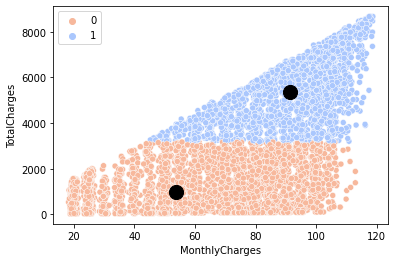

In [78]:
# Let's plot the clusters
sns.scatterplot(data= X, x = "MonthlyCharges", y = "TotalCharges", hue= y_kmeans2, palette = "coolwarm_r")

# Let's plot the centers
plt.scatter(centers2[:, 0], centers2[:, 1], c = 'black', s = 200);
plt.xlabel("MonthlyCharges")
plt.ylabel("TotalCharges")
plt.show()

### Finding the optimal number of clusters

#### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the inertia metric:

In [79]:
print("Inertia of n_clusters = 2 : " + str(kmeans2.inertia_))

Inertia of n_clusters = 2 : 7922649716.850443


#### Multiple Initializations

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia.

Inertia of n_clusters = 3 : 3699633645.9605055


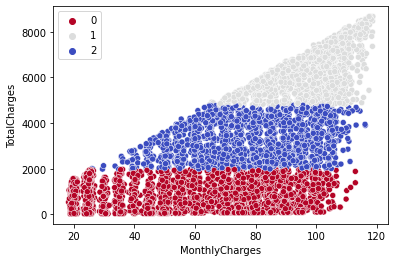

In [80]:
# Applying k-means where n_clusters = 3
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans3 = kmeans3.fit_predict(X)

# Let's plot the clusters
sns.scatterplot(data= X, x = "MonthlyCharges", y = "TotalCharges", hue= y_kmeans3, palette = "coolwarm_r")

print("Inertia of n_clusters = 3 : " + str(kmeans3.inertia_))

Inertia of n_clusters = 4 : 2114444630.292778


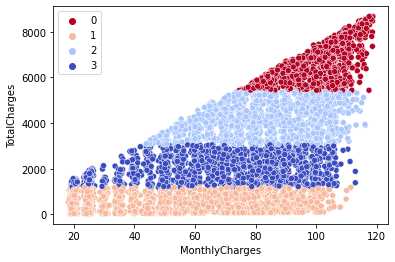

In [81]:
# Applying k-means where n_clusters = 4
kmeans4 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans4 = kmeans4.fit_predict(X)

# Let's plot the clusters
sns.scatterplot(data= X, x = "MonthlyCharges", y = "TotalCharges", hue = y_kmeans4, palette = "coolwarm_r")

print("Inertia of n_clusters = 4 : " + str(kmeans4.inertia_))

Inertia of n_clusters = 5 : 1327975281.2013657


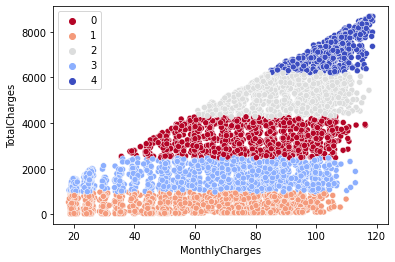

In [82]:
# Applying k-means where n_clusters = 5
kmeans5 = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans5 = kmeans5.fit_predict(X)

# Let's plot the clusters
sns.scatterplot(data= X, x = "MonthlyCharges", y = "TotalCharges", hue= y_kmeans5, palette = "coolwarm_r")

print("Inertia of n_clusters = 5 : " + str(kmeans5.inertia_))

Inertia of n_clusters = 6 : 914606833.4295957


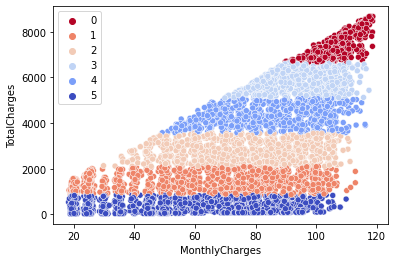

In [83]:
# Applying k-means where n_clusters = 6
kmeans6 = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans6 = kmeans6.fit_predict(X)

# Let's plot the clusters
sns.scatterplot(data= X, x = "MonthlyCharges", y = "TotalCharges", hue= y_kmeans6, palette = "coolwarm_r")

print("Inertia of n_clusters = 6 : " + str(kmeans6.inertia_))

We cannot simply take the value of 𝑘 that minimizes the inertia, since it keeps getting lower as we increase the number of clusters (𝑘) . Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of 𝑘 and analyze the resulting curve:

#### The Elbow's Method

In [84]:
# Applying k-means to dataframe X, where number of clusters is in a range of 1-10
kmeans_per_k = [KMeans(n_clusters = k, random_state = 0, init = 'k-means++').fit(X)
                for k in range(1, 11)]
# Gets the intertia of each k-means in kmeans_per_k 
inertias = [model.inertia_ for model in kmeans_per_k]

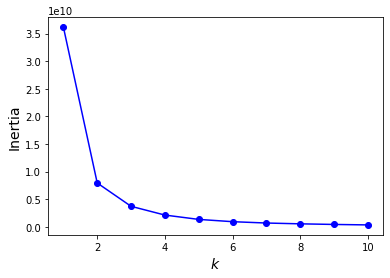

In [85]:
# Plotting the curve of Inertias according to the number of clusters
plt.plot(range(1, 11), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

By the above plot we can see an elbow at k = 2, which indicates the optimal number of clusters for this dataset is 2.

Now let's also use <b> The Silhouette Method </b> to calculate the optimal number of clusters.

#### The Silhouette Method

In [86]:
from sklearn.metrics import silhouette_score

for k in range(2,11):
    # Applying k-means to dataframe X, where number of clusters is in a range of 2-10
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
    pred = kmeans.fit_predict(X)
        
    # The silhouette_score gives the average value for all the predicted samples.
    score = silhouette_score(X, pred)
    print ("For n_clusters = {}, silhouette score is {}".format(k, score))

For n_clusters = 2, silhouette score is 0.7030501186044441
For n_clusters = 3, silhouette score is 0.6446165768092711
For n_clusters = 4, silhouette score is 0.6021763256568483
For n_clusters = 5, silhouette score is 0.5971458228740308
For n_clusters = 6, silhouette score is 0.5954772434294661
For n_clusters = 7, silhouette score is 0.5852193275452102
For n_clusters = 8, silhouette score is 0.569202323255449
For n_clusters = 9, silhouette score is 0.5670815224038472
For n_clusters = 10, silhouette score is 0.5644850978654194


So according to The Silhouette Method, we can see that the highest silhouette score is for 2 clusters, therefore the optimal number of clusters for this dataset is 2.

From both the methods we applied to get the optimal number of clusters (Elbow Method & Silhouette Method), we got the same results. The optimal number of clusters for dataframe X is 2.

##### Since we already know our target variable, let's check how accurate was our k-means algorithm

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

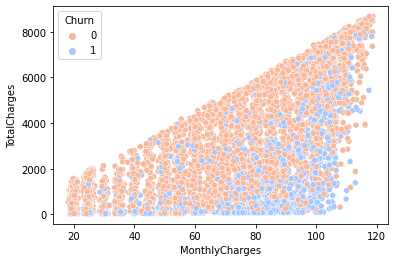

In [87]:
# Let's plot the scatter plot w.r.t target variable "Churn"
sns.scatterplot(data = data_copy, x = "MonthlyCharges", y = "TotalCharges", hue = data_copy.Churn, palette = "coolwarm_r")

If we compare this plot, with the kmeans algorithm generated plot (cluster plot), we can see a difference between these two. This is most probably because the clusters weren't assigned accurately. <br>
But since there are also few similarities between the 2 plots we can assume that ; <b>Cluster 0</b> most likely refers to <b>No</b> and, <b>Cluster 1</b> referes to <b>Yes</b>

<u> Now let's check the accuracy of the k-means algorithm. </u>

In [88]:
# Target variable
y = data_copy["Churn"]

In [89]:
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans2 = kmeans2.fit_predict(X)

# Get the labels of each sample
labels2 = kmeans2.labels_

# Calculating the number of samples correctly labelled
correct_labelled_2 = sum(y == labels2)

print("=> %d/%d were correctly labelled." % (correct_labelled_2, y.size))

# Calculating the accuracy of the k-means where n_cluster=2
Accuracy_2 = (correct_labelled_2/float(y.size)*100)
print("=> Accuracy when n_clusters = 2 : " + str(round(Accuracy_2)) +"%")

=> 3316/7032 were correctly labelled.
=> Accuracy when n_clusters = 2 : 47%


The accuracy is 47%. This proves why there was a huge difference between the 2 plots.

Let's also find the accuracy when we increase the number of clusters.

<b> 3 Clusters </b>

In [90]:
# Get the labels of each sample
labels3 = kmeans3.labels_

# Calculating the number of samples correctly labelled
correct_labelled_3 = sum(y == labels3)

print("=> %d/%d were correctly labelled." % (correct_labelled_3, y.size))

# Calculating the accuracy of the k-means where n_cluster=3
Accuracy_3 = (correct_labelled_3/float(y.size)*100)
print("=> Accuracy when n_clusters = 3 : " + str(round(Accuracy_3)) +"%")

=> 2997/7032 were correctly labelled.
=> Accuracy when n_clusters = 3 : 43%


<b> 4 Clusters </b>

In [91]:
# Get the labels of each sample
labels4 = kmeans4.labels_

# Calculating the number of samples correctly labelled
correct_labelled_4 = sum(y == labels4)

print("=> %d/%d were correctly labelled." % (correct_labelled_4, y.size))

# Calculating the accuracy of the k-means where n_cluster=4
Accuracy_4 = (correct_labelled_4/float(y.size)*100)
print("=> Accuracy when n_clusters = 4 : " + str(round(Accuracy_4)) +"%")

=> 1996/7032 were correctly labelled.
=> Accuracy when n_clusters = 4 : 28%


<b> 5 Clusters </b>

In [92]:
# Get the labels of each sample
labels5 = kmeans5.labels_

# Calculating the number of samples correctly labelled
correct_labelled_5 = sum(y == labels5)

print("=> %d/%d were correctly labelled." % (correct_labelled_5, y.size))

# Calculating the accuracy of the k-means where n_cluster=5
Accuracy_5 = (correct_labelled_5/float(y.size)*100)
print("=> Accuracy when n_clusters = 5 : " + str(round(Accuracy_5)) +"%")

=> 1859/7032 were correctly labelled.
=> Accuracy when n_clusters = 5 : 26%


<b> 6 Clusters </b>

In [93]:
# Get the labels of each sample
labels6 = kmeans6.labels_

# Calculating the number of samples correctly labelled
correct_labelled_6 = sum(y == labels6)

print("=> %d/%d were correctly labelled." % (correct_labelled_6, y.size))

# Calculating the accuracy of the k-means where n_cluster=6
Accuracy_6 = (correct_labelled_6/float(y.size)*100)
print("=> Accuracy when n_clusters = 6 : " + str(round(Accuracy_6)) +"%")

=> 742/7032 were correctly labelled.
=> Accuracy when n_clusters = 6 : 11%


We can see that when the number of clusters is increasing the accuracy is decreasing. So the optimal number of clusters for dataframe X is definetely 2.

### Attempt to increase the k-means accuracy - Using PCA before applying K-Means

Since our accuarcy in k-means is low, lets try implementing PCA, a dimensionality reduction technique to see if we can increase our accuracy. 

In [94]:
datas = data_copy.drop("Churn", axis = 1)
datas.describe()

gender  SeniorCitizen      Partner   Dependents  PhoneService  \
count  7032.000000    7032.000000  7032.000000  7032.000000   7032.000000   
mean      0.504693       0.162400     0.482509     0.298493      0.903299   
std       0.500014       0.368844     0.499729     0.457629      0.295571   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     0.000000      1.000000   
50%       1.000000       0.000000     0.000000     0.000000      1.000000   
75%       1.000000       0.000000     1.000000     1.000000      1.000000   
max       1.000000       1.000000     1.000000     1.000000      1.000000   

       PaperlessBilling  MonthlyCharges  TotalCharges  MultipleLines_No  \
count       7032.000000     7032.000000   7032.000000       7032.000000   
mean           0.592719       64.798208   2283.300441          0.481371   
std            0.491363       30.085974   2266.771362          0.499688   
min            0.000000       18.250000     18.800000          0.000000   
25%            0.000000       35.587500    401.450000          0.000000   
50%            1.000000       70.350000   1397.475000          0.000000   
75%            1.000000       89.862500   3794.737500          1.000000   
max            1.000000      118.750000   8684.800000          1.000000   

       MultipleLines_No phone service  ...  PaymentMethod_Bank Transfer  \
count                     7032.000000  ...                  7032.000000   
mean                         0.096701  ...                     0.219283   
std                          0.295571  ...                     0.413790   
min                          0.000000  ...                     0.000000   
25%                          0.000000  ...                     0.000000   
50%                          0.000000  ...                     0.000000   
75%                          0.000000  ...                     0.000000   
max                          1.000000  ...                     1.000000   

       PaymentMethod_Credit Card  PaymentMethod_E-Check  \
count                7032.000000            7032.000000   
mean                    0.216297               0.336320   
std                     0.411748               0.472483   
min                     0.000000               0.000000   
25%                     0.000000               0.000000   
50%                     0.000000               0.000000   
75%                     0.000000               1.000000   
max                     1.000000               1.000000   

       PaymentMethod_Mailed Check  Tenure Period_0 - 12  \
count                 7032.000000           7032.000000   
mean                     0.228100              0.309300   
std                      0.419637              0.462238   
min                      0.000000              0.000000   
25%                      0.000000              0.000000   
50%                      0.000000              0.000000   
75%                      0.000000              1.000000   
max                      1.000000              1.000000   

       Tenure Period_12 - 24  Tenure Period_24 - 36  Tenure Period_36 - 48  \
count             7032.00000            7032.000000            7032.000000   
mean                 0.14562               0.118316               0.108362   
std                  0.35275               0.323005               0.310859   
min                  0.00000               0.000000               0.000000   
25%                  0.00000               0.000000               0.000000   
50%                  0.00000               0.000000               0.000000   
75%                  0.00000               0.000000               0.000000   
max                  1.00000               1.000000               1.000000   

       Tenure Period_48 - 60  Tenure Period_60 - 72  
count            7032.000000            7032.000000  
mean                0.118316               0.200085  
std                 0.323005         

Here, we see that there is a lot of variation in the magnitude of the data. Variables like MonthlyCharges and TotalCharges have a high magnitude while the other variables have a low magnitude.
Since PCA is effected by magnitude we need need to scale the features in the dataset before applying PCA. This can be done using the StandardScaler

In [95]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
data_scale = scale.fit_transform(datas)
data_scale_df = pd.DataFrame(data_scale)
data_scale_df.head(3)

0         1         2         3         4         5         6   \
0 -1.009430 -0.440327  1.035617 -0.652305 -3.056334  0.828939 -1.161694   
1  0.990658 -0.440327 -0.965608 -0.652305  0.327189 -1.206361 -0.260878   
2  0.990658 -0.440327 -0.965608 -0.652305  0.327189  0.828939 -0.363923   

         7         8         9   ...        35        36        37        38  \
0 -0.994194 -0.963411  3.056334  ... -0.529976 -0.525351  1.404764 -0.543604   
1 -0.173740  1.037979 -0.327189  ... -0.529976 -0.525351 -0.711863  1.839576   
2 -0.959649  1.037979 -0.327189  ... -0.529976 -0.525351 -0.711863  1.839576   

         39        40        41        42        43        44  
0  1.494357 -0.412843 -0.366324 -0.348613 -0.366324 -0.500133  
1 -0.669184 -0.412843  2.729821 -0.348613 -0.366324 -0.500133  
2  1.494357 -0.412843 -0.366324 -0.348613 -0.366324 -0.500133  

[3 rows x 45 columns]

#### Using PCA

By applying PCA, my original dataset which has 45 features is reduced to 2 features 

In [96]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pc = pca.fit_transform(data_scale_df)

pc_df = pd.DataFrame(data = pc, columns = ['principal component 1','principal component 2'])
pc_df.tail()

principal component 1  principal component 2
7027              -1.266907               2.516348
7028              -2.458207               3.978846
7029              -1.460177              -3.079787
7030              -1.821218              -3.161957
7031              -1.777787               3.810327

#### Implementing K-Means Algorithm

In [97]:
# Perform K-means algorithm for pc_df dataframe
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_pca = kmeans_pca.fit_predict(pc_df)
y_kmeans_pca

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [98]:
# Let's add the predicted clusters to the pc_df dataframe 
pc_df["Cluster"] = y_kmeans_pca
pc_df.tail()

principal component 1  principal component 2  Cluster
7027              -1.266907               2.516348        0
7028              -2.458207               3.978846        0
7029              -1.460177              -3.079787        0
7030              -1.821218              -3.161957        0
7031              -1.777787               3.810327        0

In [99]:
# Coordinates of the centers
centers = kmeans_pca.cluster_centers_
centers

array([[-1.72871438, -0.06019315],
       [ 6.26886426,  0.21827937]])

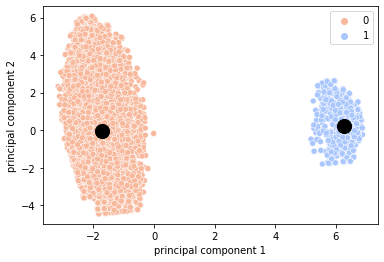

In [100]:
# Plot clusters
sns.scatterplot(data = pc_df, x = "principal component 1", y = "principal component 2", hue = y_kmeans_pca, palette = "coolwarm_r")

# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200);
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()

##### The Elbow's Method

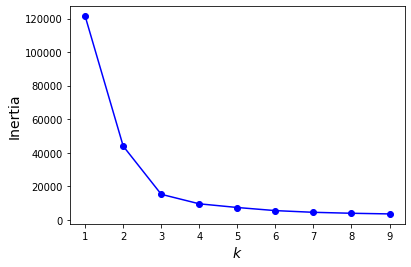

In [101]:
kmeans_per_k = [KMeans(n_clusters = k, init = 'k-means++', random_state = 0).fit(pc_df)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

We can see an elbow at k = 2 and 3, but let's also use the silhouette method to get the optimal number of clusters.

##### The Silhouette Method

In [102]:
for k in range(2,11):
    # Applying k-means to dataframe pc_df, where number of clusters is in a range of 2-10
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
    pred = kmeans.fit_predict(pc_df)
        
    # The silhouette_score gives the average value for all the predicted samples.
    score = silhouette_score(pc_df, pred)
    print ("For n_clusters = {}, silhouette score is {}".format(k, score))

For n_clusters = 2, silhouette score is 0.6655590964656334
For n_clusters = 3, silhouette score is 0.6224898057424948
For n_clusters = 4, silhouette score is 0.562454125636825
For n_clusters = 5, silhouette score is 0.527549295740203
For n_clusters = 6, silhouette score is 0.47553816681054334
For n_clusters = 7, silhouette score is 0.4439407179324763
For n_clusters = 8, silhouette score is 0.42076876230357757
For n_clusters = 9, silhouette score is 0.4073229411567324
For n_clusters = 10, silhouette score is 0.4096933782818116


So according to The Silhouette Method the optimal number of clusters for the dataset is 2.

##### Now let's see if my attempt on using PCA to improve the accuracy worked

In [103]:
y = data_copy["Churn"]

# Get the labels of each sample
labels = kmeans_pca.labels_

# Calculating the number of samples correctly labelled
correct = sum(y == labels)

print("=> %d/%d were correctly labeled." % (correct, y.size))

# Calculating the accuracy of k-means after using PCA
Accuracy = (correct/float(y.size)*100)
print("=> Accuracy of k-means for 2 clusters after using PCA : " + str(round(Accuracy)) +"%")

=> 3869/7032 were correctly labeled.
=> Accuracy of k-means for 2 clusters after using PCA : 55%


Before using PCA, the accuracy of k-means was 47%, and after using PCA the accuracy increased to 55%

## Hierarchical Clustering

In [104]:
# X dataframe with MonthlyCharges and TotalCharges as features
X = data_copy[["MonthlyCharges", "TotalCharges"]]

Let’s draw the dendrogram to decide the number of clusters

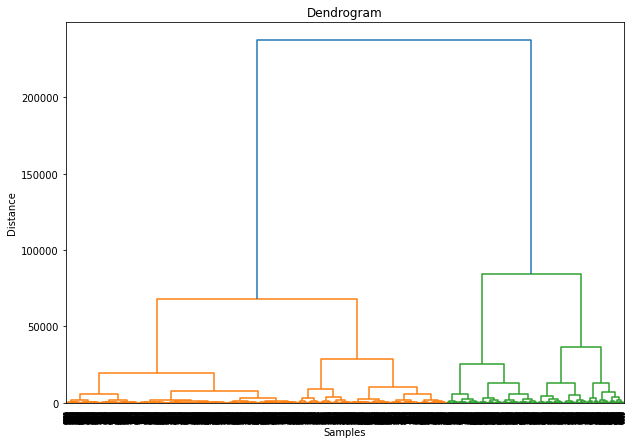

In [105]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
plt.xlabel("Samples")
plt.ylabel("Distance")
dendogram = shc.dendrogram(shc.linkage(X, method = 'ward'))

The vertical line with maximum distance is the blue line and hence we can decide a threshold of 100000 and cut the dendrogram.

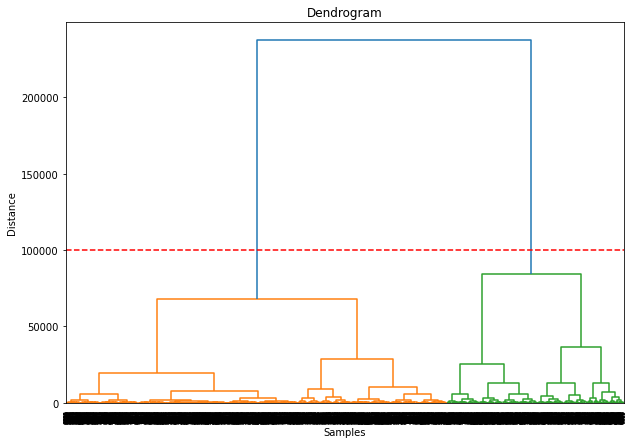

In [106]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
plt.xlabel("Samples")
plt.ylabel("Distance")
dendogram = shc.dendrogram(shc.linkage(X, method = 'ward'))
plt.axhline(y = 100000, color = 'r', linestyle = '--')

From the dendrogram, we know that the number of clusters for this dataset is 2. So now let's apply the Hierarchical Clustering for 2 clusters.

#### Agglomerative Hierarchical Clustering

In Agglomerative Hierarchical Clustering, initially, each data point is treated as a separate cluster. And each iteration closest pair of clusters will be merged until one cluster is produced.

In [107]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')  
hierarchical = cluster.fit_predict(X)
hierarchical

array([1, 1, 1, ..., 1, 1, 0])

In [108]:
X["Cluster"] = hierarchical
X.tail()

MonthlyCharges  TotalCharges  Cluster
7038           84.80       1990.50        1
7039          103.20       7362.90        0
7040           29.60        346.45        1
7041           74.40        306.60        1
7042          105.65       6844.50        0

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

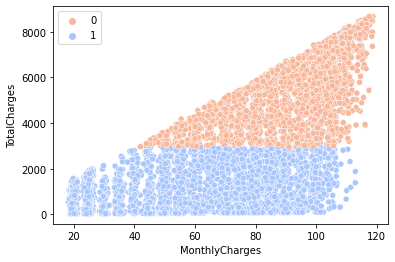

In [109]:
# Let's plot the clusters
sns.scatterplot(data = X, x = "MonthlyCharges", y = "TotalCharges", hue = hierarchical, palette = "coolwarm_r")

Let's find the accuracy of the hierarchical clustering.

In [110]:
# Get the labels of each sample
hie_labels = cluster.labels_

# Calculating the number of samples correctly labelled
hie_correct = sum(y == hie_labels)

print("=> %d/%d were correctly labelled." % (hie_correct, y.size))

# Calculating the accuracy of the Hierarchical Clustering
hie_Accuracy = (hie_correct/float(y.size)*100)
print("=> Accuracy when n_clusters = 2 : " + str(round(hie_Accuracy)) +"%")

=> 3389/7032 were correctly labelled.
=> Accuracy when n_clusters = 2 : 48%


### K-Means vs Hierarchical Clustering

<li>The number of clusters should be known before using the K-means algorithm. However, with hierarchical clustering, we can simply determine the appropriate number of clusters by interpreting it in a dendrogram. </li><br>
<li>A noticeable difference was the time of computation; K-means algorithm computed faster. And hierarchical clustering did take some time to compute the results. Which means for larger dataset applying k-means is a good choice.</li><br>
<li>The hierarchical results are structured, interpretable, and informative. Unlike k-means, which produces unstructured results.</li>

### K-Means vs Hierarchical Clustering vs Bayesian Classification

When comparing the accuracy of both the clustering algorithms with the bayseian classification, the bayesian performed well with an accuracy of 66.3% 

# Part 3 : Supervised Learning - Decision Trees

In [161]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [162]:
df = data.apply(lambda x: object_to_int(x))
df.head(2)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0

In [163]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

#### Train Test Split

In [164]:
# Splitting dataset into train set and test set, 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5625, 19) (5625,)
(1407, 19) (1407,)


### Using Training Data

In [165]:
# Applying decision tree model to the training set
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_train)

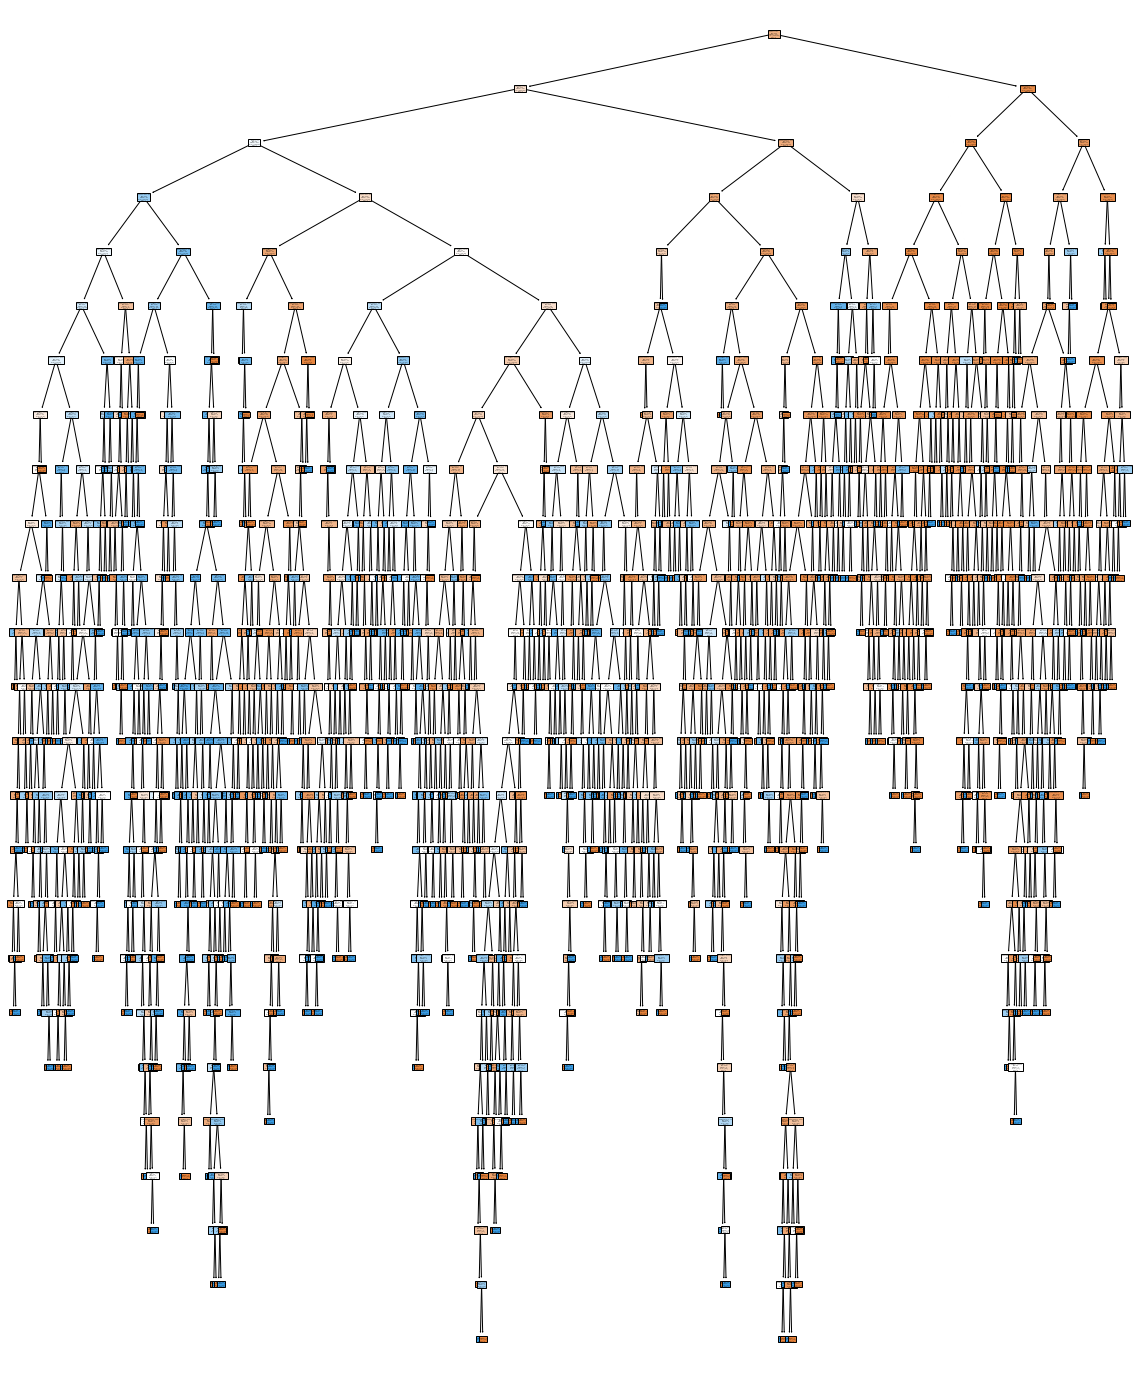

In [166]:
# Plotting the decison tree for the training set
from sklearn import tree

fig = plt.figure(figsize=(20,25))
feature_cols = list(X.columns)
_ = tree.plot_tree(dt_model, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)

Since my dataset has 19 features, the decision tree isn't clear, so let's get the text representation of the decision tree to get a better understanding.

In [167]:
# Text representation of the Decision Tree
text_representation = tree.export_text(dt_model,feature_names=feature_cols )
print(text_representation)

|--- Contract <= 0.50
|   |--- OnlineSecurity <= 0.50
|   |   |--- tenure <= 7.50
|   |   |   |--- InternetService <= 0.50
|   |   |   |   |--- TotalCharges <= 206.98
|   |   |   |   |   |--- SeniorCitizen <= 0.50
|   |   |   |   |   |   |--- MonthlyCharges <= 45.02
|   |   |   |   |   |   |   |--- TotalCharges <= 141.78
|   |   |   |   |   |   |   |   |--- StreamingMovies <= 1.00
|   |   |   |   |   |   |   |   |   |--- PaperlessBilling <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- TotalCharges <= 25.23
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- TotalCharges >  25.23
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- PaperlessBilling >  0.50
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges <= 44.48
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- Month

In [168]:
# To calculate accuracy, precison, recall and f1
from sklearn import metrics

accuracy_dt = metrics.accuracy_score(y_train, predictdt_y)*100

# Performance report
print("Performance report on Decision Tree (Training Set)")
print("------------------------------------")
print("Accuracy : " + str(round(accuracy_dt, 2)) + "%")
print(classification_report(y_train, predictdt_y))

Performance report on Decision Tree (Training Set)
------------------------------------
Accuracy : 99.88%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



We can see that the accuracy is quite high, with a percentage of 99.88%, and we also have got the highest precision, recall, and F1 scores. Because we used the Decision Tree on the Training Set, this result was expected. Clearly the model is overfitting the training data.

#### 10-fold Cross Validation

In [169]:
# Evaluate a decision tree model using 10-fold cross-validation
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Applying the cross validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Applying Decison Tree model
model = DecisionTreeClassifier()

# Calculating performance metrics
score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
precision = cross_val_score(model, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
recall = cross_val_score(model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)
f1 = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

# Performance report
print("Performance report on Decision Tree after 10-fold Cross Validation")
print("-------------------------------------------------------------------")
print("Accuarcy : " + str(round(mean(score)*100, 2)) + "%")
print("")
print('Precision : ', round(np.mean(precision),2), precision)
print("")
print('Recall : ', round(np.mean(recall),2), recall)
print("")
print('F1-score : ', round(np.mean(f1),2), f1)
print("")

Performance report on Decision Tree after 10-fold Cross Validation
-------------------------------------------------------------------
Accuarcy : 73.23%

Precision :  0.48 [0.47435897 0.41891892 0.46753247 0.48666667 0.47337278 0.48837209
 0.48701299 0.52554745 0.49032258 0.52348993]

Recall :  0.52 [0.55223881 0.44525547 0.48648649 0.53956835 0.49068323 0.55769231
 0.53741497 0.5125     0.51973684 0.52173913]

F1-score :  0.5 [0.49829352 0.42105263 0.5170068  0.50847458 0.4587156  0.49221184
 0.50160772 0.52117264 0.49838188 0.53846154]



After applying the 10-fold corss validation, the Accuracy has drastically decreased from 99.88% to 73.23% (by 26.65%) 

### Using Training and Test Data

In [170]:
# Here using both train and test data set for the Decision Tree model
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_predict_y = dt_clf.predict(X_test)

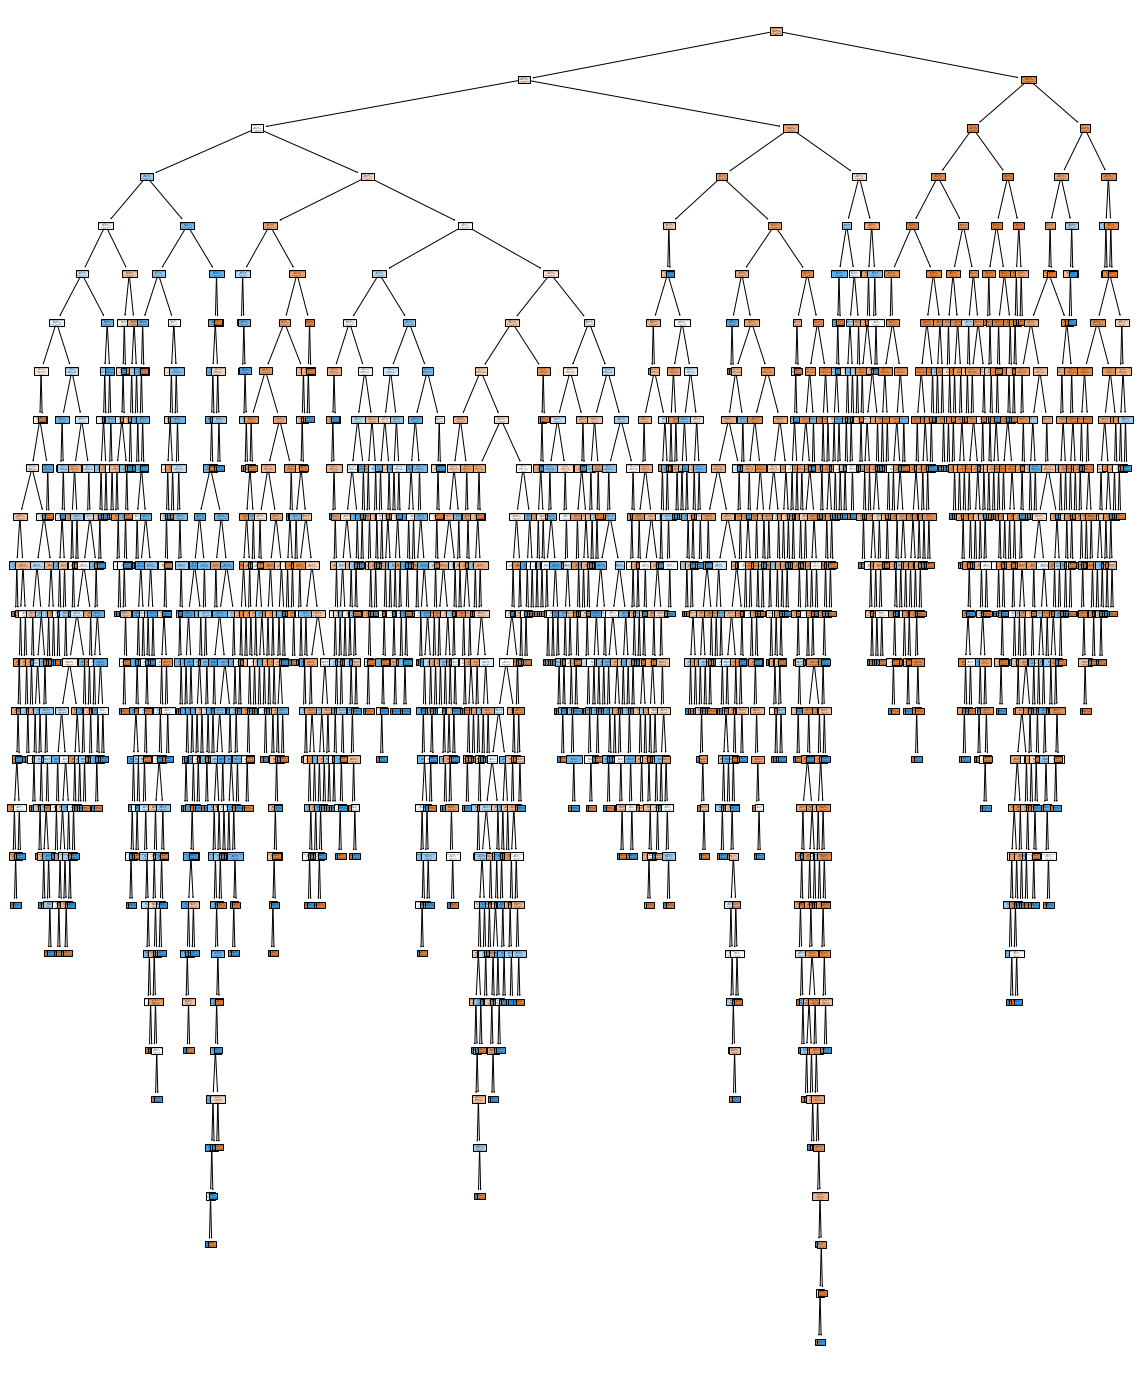

In [171]:
# Plotting the Decison Tree - tree diagram is not clear because of 19 features
fig2 = plt.figure(figsize=(20,25))
feature_cols = list(X.columns)
_ = tree.plot_tree(dt_clf, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)

In [172]:
# Text representation of the Decision Tree
text_representation = tree.export_text(dt_clf,feature_names=feature_cols )
print(text_representation)

|--- Contract <= 0.50
|   |--- OnlineSecurity <= 0.50
|   |   |--- tenure <= 7.50
|   |   |   |--- InternetService <= 0.50
|   |   |   |   |--- TotalCharges <= 206.98
|   |   |   |   |   |--- SeniorCitizen <= 0.50
|   |   |   |   |   |   |--- MonthlyCharges <= 45.02
|   |   |   |   |   |   |   |--- TotalCharges <= 141.78
|   |   |   |   |   |   |   |   |--- StreamingMovies <= 1.00
|   |   |   |   |   |   |   |   |   |--- PaperlessBilling <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- TotalCharges <= 25.23
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- TotalCharges >  25.23
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- PaperlessBilling >  0.50
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges <= 44.48
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- Month

In [174]:
# Calculating the major metrics to get a better understanding of the Decision Tree performance 
dt_clf_accuracy = metrics.accuracy_score(y_test, dt_predict_y)*100

# Performance report
print("Performance report on Decision Tree")
print("------------------------------------")
print("Accuracy : " + str(round(dt_clf_accuracy, 2)) + "%")
print(classification_report(y_test, dt_predict_y))

Performance report on Decision Tree
------------------------------------
Accuracy : 72.21%
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.72      1407



When applying Decision Tree using both train and test set we can observe a decrease in accuaracy from 99.93% to 72.21% (by 27.72%), even when compared with the cross-validation we can see a slight decrease by 1.02%. <br><br>
So to answer the question; Does the decision tree generalize well to new data? No, it does not. Because when the prediction accuracy is high, the Generalization is stronger. Since my prediction accuracy is low when compared to the training set, my the generalization is also weaker, therefore the Decision Tree does not generalize well to new data.

### Experimenting with various decision tree parameters

#### max_depth

In [175]:
for k in range(2, 20):
    dt_model1 = DecisionTreeClassifier(max_depth = k)
    dt_model1.fit(X_train,y_train)
    predictdt_y1 = dt_model1.predict(X_test)
    accuracy1 = (metrics.accuracy_score(y_test, predictdt_y1))*100
    print("Accuracy when max_depth = " + str(k) + " : " + str(round(accuracy1, 2)) + "%")

Accuracy when max_depth = 2 : 72.85%
Accuracy when max_depth = 3 : 76.97%
Accuracy when max_depth = 4 : 77.11%
Accuracy when max_depth = 5 : 78.18%
Accuracy when max_depth = 6 : 77.83%
Accuracy when max_depth = 7 : 77.47%
Accuracy when max_depth = 8 : 75.91%
Accuracy when max_depth = 9 : 75.98%
Accuracy when max_depth = 10 : 75.69%
Accuracy when max_depth = 11 : 74.2%
Accuracy when max_depth = 12 : 74.2%
Accuracy when max_depth = 13 : 73.85%
Accuracy when max_depth = 14 : 73.63%
Accuracy when max_depth = 15 : 74.13%
Accuracy when max_depth = 16 : 73.21%
Accuracy when max_depth = 17 : 72.64%
Accuracy when max_depth = 18 : 71.78%
Accuracy when max_depth = 19 : 72.57%


Here I have used a for loop to get the accuaracy of each model when the max_depth is changed in a range from 2-19. The highest accuracy is noted when the max_depth=5. So it is obvious that there is no need for a deeper tree, a tree with depth between 5 is enough to make better predictions.

#### min_samples_split

In [177]:
for k in range(5,250,5):
    dt_model2 = DecisionTreeClassifier(min_samples_split = k)
    dt_model2.fit(X_train,y_train)
    predictdt_y2 = dt_model2.predict(X_test)
    accuracy2 = (metrics.accuracy_score(y_test, predictdt_y2))*100
    print("Accuracy when min_samples_split = " + str(k) + " : " + str(round(accuracy2, 2)) + "%")

Accuracy when min_samples_split = 5 : 73.21%
Accuracy when min_samples_split = 10 : 73.56%
Accuracy when min_samples_split = 15 : 73.85%
Accuracy when min_samples_split = 20 : 75.41%
Accuracy when min_samples_split = 25 : 75.62%
Accuracy when min_samples_split = 30 : 75.62%
Accuracy when min_samples_split = 35 : 75.76%
Accuracy when min_samples_split = 40 : 75.76%
Accuracy when min_samples_split = 45 : 76.12%
Accuracy when min_samples_split = 50 : 76.19%
Accuracy when min_samples_split = 55 : 76.76%
Accuracy when min_samples_split = 60 : 76.9%
Accuracy when min_samples_split = 65 : 77.11%
Accuracy when min_samples_split = 70 : 77.04%
Accuracy when min_samples_split = 75 : 77.47%
Accuracy when min_samples_split = 80 : 77.33%
Accuracy when min_samples_split = 85 : 77.54%
Accuracy when min_samples_split = 90 : 77.47%
Accuracy when min_samples_split = 95 : 77.54%
Accuracy when min_samples_split = 100 : 77.33%
Accuracy when min_samples_split = 105 : 77.47%
Accuracy when min_samples_split = 

Here we get the same accuaracy (77.83%) when min_sample_split = 175-220. So I'll select 175 as the value for min_sample_split to apply in the best model because high number of splits can cause overfitting.

#### min_samples_leaf

In [178]:
for k in range(5,150,5):
    dt_model3 = DecisionTreeClassifier(min_samples_leaf = k)
    dt_model3.fit(X_train,y_train)
    predictdt_y3 = dt_model3.predict(X_test)
    accuracy3 = (metrics.accuracy_score(y_test, predictdt_y3))*100
    print("Accuracy when min_samples_leaf = " + str(k) + " : " + str(round(accuracy3, 2)) + "%")

Accuracy when min_samples_leaf = 5 : 74.34%
Accuracy when min_samples_leaf = 10 : 77.11%
Accuracy when min_samples_leaf = 15 : 76.9%
Accuracy when min_samples_leaf = 20 : 78.68%
Accuracy when min_samples_leaf = 25 : 78.46%
Accuracy when min_samples_leaf = 30 : 77.68%
Accuracy when min_samples_leaf = 35 : 77.9%
Accuracy when min_samples_leaf = 40 : 77.61%
Accuracy when min_samples_leaf = 45 : 78.18%
Accuracy when min_samples_leaf = 50 : 78.54%
Accuracy when min_samples_leaf = 55 : 78.61%
Accuracy when min_samples_leaf = 60 : 78.96%
Accuracy when min_samples_leaf = 65 : 79.03%
Accuracy when min_samples_leaf = 70 : 78.82%
Accuracy when min_samples_leaf = 75 : 78.54%
Accuracy when min_samples_leaf = 80 : 78.54%
Accuracy when min_samples_leaf = 85 : 78.54%
Accuracy when min_samples_leaf = 90 : 78.54%
Accuracy when min_samples_leaf = 95 : 78.54%
Accuracy when min_samples_leaf = 100 : 78.54%
Accuracy when min_samples_leaf = 105 : 78.54%
Accuracy when min_samples_leaf = 110 : 78.04%
Accuracy w

We can see that the highest accuracy 70.03% when min_samples_leaf = 65.

#### max_leaf_nodes

In [180]:
for k in range(2,31):
    dt_model4 = DecisionTreeClassifier(max_leaf_nodes = k)
    dt_model4.fit(X_train,y_train)
    predictdt_y4 = dt_model4.predict(X_test)
    accuracy4 = (metrics.accuracy_score(y_test, predictdt_y4))*100
    print("Accuracy when max_leaf_nodes = " + str(k) + " : " + str(round(accuracy4, 2)) + "%")

Accuracy when max_leaf_nodes = 2 : 73.42%
Accuracy when max_leaf_nodes = 3 : 72.85%
Accuracy when max_leaf_nodes = 4 : 76.97%
Accuracy when max_leaf_nodes = 5 : 76.97%
Accuracy when max_leaf_nodes = 6 : 76.97%
Accuracy when max_leaf_nodes = 7 : 77.4%
Accuracy when max_leaf_nodes = 8 : 77.4%
Accuracy when max_leaf_nodes = 9 : 77.4%
Accuracy when max_leaf_nodes = 10 : 77.61%
Accuracy when max_leaf_nodes = 11 : 77.61%
Accuracy when max_leaf_nodes = 12 : 76.9%
Accuracy when max_leaf_nodes = 13 : 77.19%
Accuracy when max_leaf_nodes = 14 : 77.19%
Accuracy when max_leaf_nodes = 15 : 77.83%
Accuracy when max_leaf_nodes = 16 : 77.83%
Accuracy when max_leaf_nodes = 17 : 77.83%
Accuracy when max_leaf_nodes = 18 : 77.83%
Accuracy when max_leaf_nodes = 19 : 77.83%
Accuracy when max_leaf_nodes = 20 : 77.83%
Accuracy when max_leaf_nodes = 21 : 77.83%
Accuracy when max_leaf_nodes = 22 : 77.9%
Accuracy when max_leaf_nodes = 23 : 77.9%
Accuracy when max_leaf_nodes = 24 : 77.9%
Accuracy when max_leaf_nod

Here we get the highest accuracy as 77.9% when max_leaf_nodes = 22, 23, 24. So I'll select 22 to apply in the best model.

#### min_impurity_decrease

In [181]:
k_values = [0.00005,0.0001,0.0002,0.0005,0.001,0.0015,0.002,0.005,0.01]

for k in k_values:
    dt_model5 = DecisionTreeClassifier(min_impurity_decrease = k)
    dt_model5.fit(X_train,y_train)
    predictdt_y5 = dt_model5.predict(X_test)
    accuracy5 = (metrics.accuracy_score(y_test, predictdt_y5))*100
    print("Accuracy when min_impurity_decrease = " + str(k) + " : " + str(round(accuracy5, 2)) + "%")

Accuracy when min_impurity_decrease = 5e-05 : 72.42%
Accuracy when min_impurity_decrease = 0.0001 : 74.34%
Accuracy when min_impurity_decrease = 0.0002 : 75.91%
Accuracy when min_impurity_decrease = 0.0005 : 77.9%
Accuracy when min_impurity_decrease = 0.001 : 77.83%
Accuracy when min_impurity_decrease = 0.0015 : 76.9%
Accuracy when min_impurity_decrease = 0.002 : 77.4%
Accuracy when min_impurity_decrease = 0.005 : 76.97%
Accuracy when min_impurity_decrease = 0.01 : 76.97%


Here we get a high accuracy when the min_impurity_decrease = 0.0005

Now let's apply all the best values to the Decision Tree model and get the accuracy

In [183]:
# Best model
dt_model6 = DecisionTreeClassifier(max_depth=5 ,min_samples_leaf = 65, min_samples_split = 175, max_leaf_nodes = 22, min_impurity_decrease = 0.0005)
dt_model6.fit(X_train,y_train)
predictdt_y6 = dt_model6.predict(X_test)
accuracy6 = (metrics.accuracy_score(y_test, predictdt_y6))*100
print("Best model accuracy : " + str(round(accuracy6, 2)) + "%")

Best model accuracy : 78.11%


After applying the best values for each parameter, we get an accuracy of 78.11%. Which is an increase by 5.9%

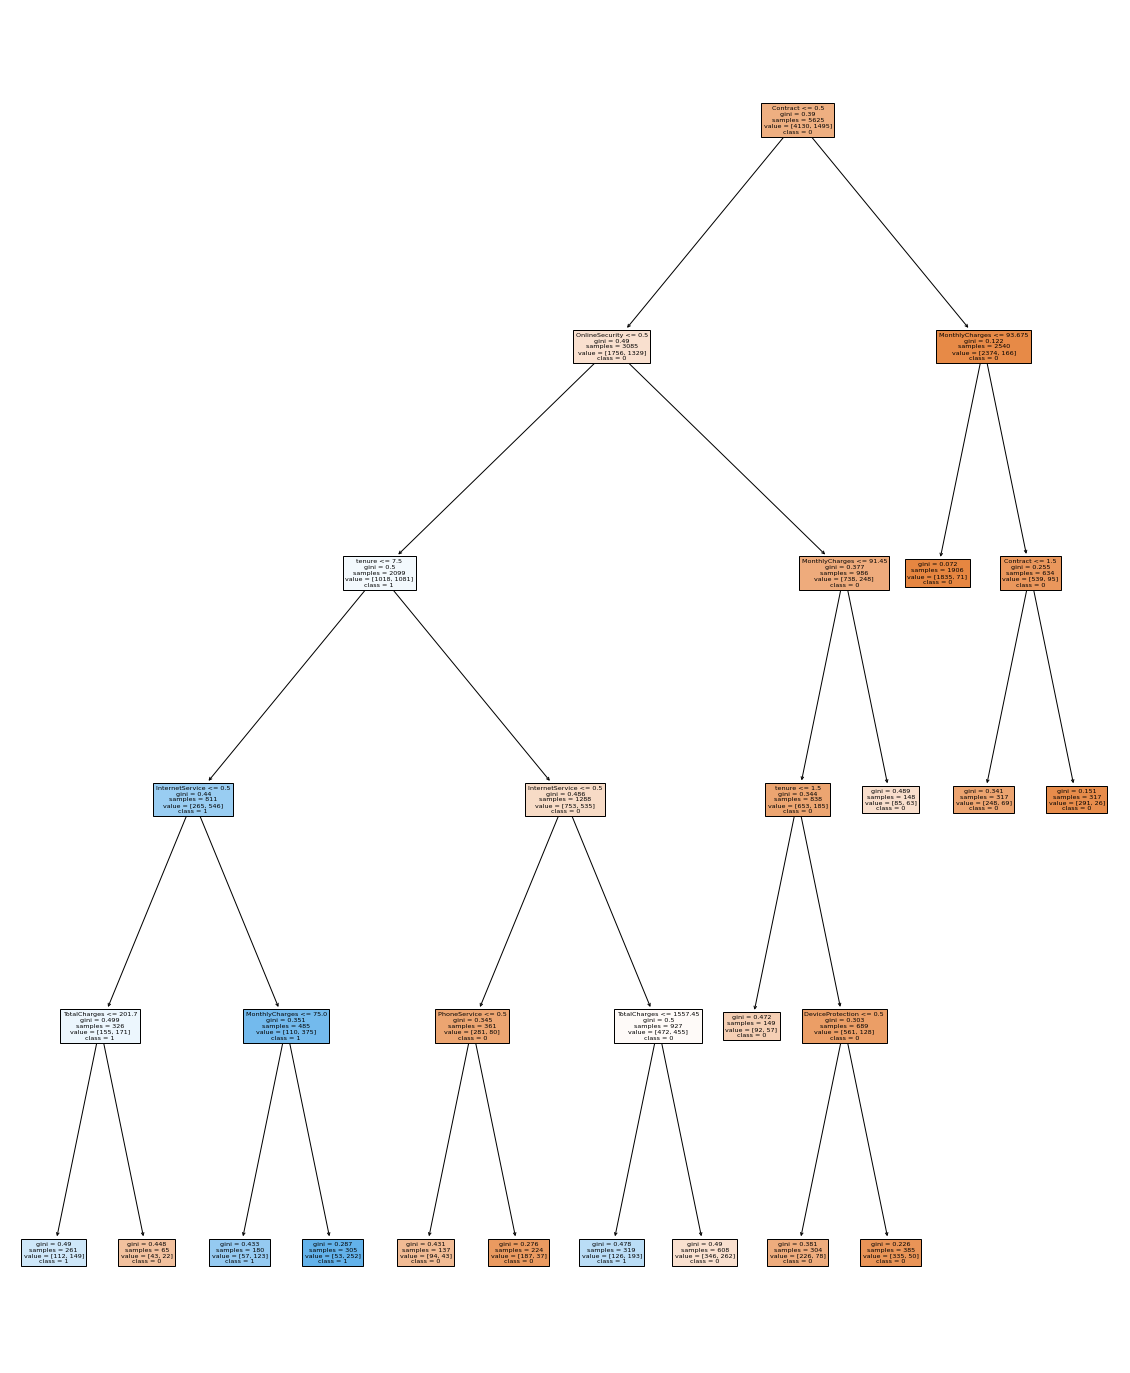

In [184]:
# Plotting the decision tree of the best model
fig = plt.figure(figsize=(20,25))
feature_cols = list(X.columns)
_ = tree.plot_tree(dt_model6, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)

##### Task 5 - Moving 30% of the instances from the original training set into the testing set. 

In [185]:
# Splitting dataset into train set and test set, 70/30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4922, 19) (4922,)
(2110, 19) (2110,)


In [186]:
model_3 = DecisionTreeClassifier()
model_3.fit(X_train,y_train)
y_pred3 = model_3.predict(X_test)
accuracy3 = metrics.accuracy_score(y_test, y_pred3)*100
print("Accuracy : " + str(round(accuracy3, 2)) + "%")

Accuracy : 73.55%


After splitting dataset 70/30 (train/test), we can see an increase in the accuracy by 1.34% => from 72.21% to 73.55%

In [188]:
# Best model - Let's calculate the accuracy for the best model after 70/30 split
best_model_3 = DecisionTreeClassifier(max_depth=5 ,min_samples_leaf = 65, min_samples_split = 175, max_leaf_nodes = 22, min_impurity_decrease = 0.0005)
best_model_3.fit(X_train,y_train)
best_y_pred3 = best_model_3.predict(X_test)
best_accuracy3 = (metrics.accuracy_score(y_test, best_y_pred3))*100
print("Best model accuracy after 70/30 split : " + str(round(best_accuracy3, 2)) + "%")

Best model accuracy after 70/30 split : 77.68%


When applying the best model after the 70/30 split, we can see an increase in the accuracy by 4.13% => 73.55% to 77.68%

##### Task 6 - Moving 60% of the instances from the original training set into the testing set. 

In [189]:
# Splitting dataset into train set and test set, 40/60 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 42, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2812, 19) (2812,)
(4220, 19) (4220,)


In [192]:
model_4 = DecisionTreeClassifier()
model_4.fit(X_train,y_train)
y_pred4 = model_4.predict(X_test)
accuracy4 = metrics.accuracy_score(y_test, y_pred4)*100
print("Accuracy : " + str(round(accuracy4, 2)) + "%")

Accuracy : 73.29%


In [191]:
# Best model
best_model_4 = DecisionTreeClassifier(max_depth=5 ,min_samples_leaf = 65, min_samples_split = 175, max_leaf_nodes = 22, min_impurity_decrease = 0.0005)
best_model_4.fit(X_train,y_train)
best_y_pred4 = best_model_4.predict(X_test)
best_accuracy4 = (metrics.accuracy_score(y_test, best_y_pred4))*100
print("Best model accuracy after 40/60 split : " + str(round(best_accuracy4, 2)) + "%")

Best model accuracy after 40/60 split : 78.34%


After considering all the accuracies I calculated on training set and test set where decision tree model was applied, the highest accuracy was noticed in the best model 40/60 split. Accuracy => 78.34%

## Random Forests

In [223]:
# Splitting dataset into train set and test set, 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5625, 19) (5625,)
(1407, 19) (1407,)


### Using Training Set

In [224]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
ypred_rf = rf.predict(X_train)

In [226]:
accuracy_rf = metrics.accuracy_score(y_train, ypred_rf)*100
# report performance
print("Performance report on Random Forest")
print("------------------------------------")
print("Accuracy : " + str(round(accuracy_rf, 2)) + "%")
print(classification_report(y_train, ypred_rf))

Performance report on Random Forest
------------------------------------
Accuracy : 99.88%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



Same as in Decision Tree when the Random Forest is applied to the training set we get a high accuracy of  99.88%

In [197]:
# evaluate a random forest classifier model using k-fold cross-validation

# Applying 10-fold cross validation
cv_rf = KFold(n_splits=10, random_state=1, shuffle=True)

# Applying the Random Forest model
model_rf = RandomForestClassifier()

# Calculating the performance metrics
score = cross_val_score(model_rf, X_train, y_train, scoring='accuracy', cv=cv_rf, n_jobs=-1)
precision = cross_val_score(model_rf, X_train, y_train, scoring='precision', cv=cv_rf, n_jobs=-1)
recall = cross_val_score(model_rf, X_train, y_train, scoring='recall', cv=cv_rf, n_jobs=-1)
f1 = cross_val_score(model_rf, X_train, y_train, scoring='f1', cv=cv_rf, n_jobs=-1)

# Performance report
print("Performance report on Random Forest Classifier after 10-fold Cross Validation")
print("-------------------------------------------------------------------")
print("Accuarcy : " + str(round(mean(score)*100, 2)) + "%")
print("")
print('Precision : ', round(np.mean(precision),2), precision)
print("")
print('Recall : ', round(np.mean(recall),2), recall)
print("")
print('F1-score : ', round(np.mean(f1),2), f1)
print("")

Performance report on Random Forest Classifier after 10-fold Cross Validation
-------------------------------------------------------------------
Accuarcy : 79.57%

Precision :  0.64 [0.61983471 0.63207547 0.65217391 0.61206897 0.65079365 0.62393162
 0.59813084 0.70434783 0.61864407 0.7037037 ]

Recall :  0.5 [0.56716418 0.48905109 0.54054054 0.51079137 0.52795031 0.46153846
 0.43537415 0.51875    0.5        0.49068323]

F1-score :  0.56 [0.59760956 0.55870445 0.58914729 0.5625     0.55244755 0.52205882
 0.53231939 0.5971223  0.53435115 0.57142857]



After applying the 10-fold corss validation, the Accuracy has drastically decreased from 99.88% to 79.57% (by 20.31%) 

### Using Traning and Testing Set

In [198]:
rf_test = RandomForestClassifier()
rf_test.fit(X_train, y_train)
ypred_test_rf = rf.predict(X_test)

In [222]:
# Calculating the major metrics to get a better understanding of the Random Forest performance 
rf_test_accuracy = metrics.accuracy_score(y_test, ypred_test_rf)*100

# Performance report
print("Performance report on Random Forest")
print("------------------------------------")
print("Accuracy : " + str(round(rf_test_accuracy, 2)) + "%")
print(classification_report(y_test, ypred_test_rf))

Performance report on Random Forest
------------------------------------
Accuracy : 78.54%
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



When applying Random Forest using both train and test set we can observe a decrease in accuaracy from 99.88% to 78.54% (by 21.34%), even when compared with the cross-validation we can see a slight decrease by 1.03%.

### Experimenting with various decision tree parameters

#### max_depth

In [203]:
for k in range(2, 20):
    rf1 = RandomForestClassifier(max_depth=k)
    rf1.fit(X_train, y_train)
    ypred_rf1 = rf1.predict(X_test)
    accurac_rf1 = (metrics.accuracy_score(y_test, ypred_rf1))*100
    print("Accuracy when max_depth = " + str(k) + " : " + str(round(accurac_rf1, 4)) + "%")

Accuracy when max_depth = 2 : 77.6119%
Accuracy when max_depth = 3 : 78.678%
Accuracy when max_depth = 4 : 78.8202%
Accuracy when max_depth = 5 : 78.3227%
Accuracy when max_depth = 6 : 78.8913%
Accuracy when max_depth = 7 : 79.1756%
Accuracy when max_depth = 8 : 79.1045%
Accuracy when max_depth = 9 : 78.8913%
Accuracy when max_depth = 10 : 79.3177%
Accuracy when max_depth = 11 : 79.1045%
Accuracy when max_depth = 12 : 78.9623%
Accuracy when max_depth = 13 : 79.4598%
Accuracy when max_depth = 14 : 79.3888%
Accuracy when max_depth = 15 : 78.7491%
Accuracy when max_depth = 16 : 78.607%
Accuracy when max_depth = 17 : 78.4648%
Accuracy when max_depth = 18 : 79.6731%
Accuracy when max_depth = 19 : 78.9623%


Highest accuracy is achieved when max_depth=13

#### min_samples_split

In [204]:
for k in range(5,200,5):
    rf2 = RandomForestClassifier(min_samples_split=k)
    rf2.fit(X_train, y_train)
    ypred_rf2 = rf2.predict(X_test)
    accurac_rf2 = (metrics.accuracy_score(y_test, ypred_rf2))*100
    print("Accuracy when min_samples_split = " + str(k) + " : " + str(round(accurac_rf2, 4)) + "%")

Accuracy when min_samples_split = 5 : 79.2466%
Accuracy when min_samples_split = 10 : 79.1045%
Accuracy when min_samples_split = 15 : 78.678%
Accuracy when min_samples_split = 20 : 79.3888%
Accuracy when min_samples_split = 25 : 79.1756%
Accuracy when min_samples_split = 30 : 79.3177%
Accuracy when min_samples_split = 35 : 79.602%
Accuracy when min_samples_split = 40 : 79.1045%
Accuracy when min_samples_split = 45 : 79.4598%
Accuracy when min_samples_split = 50 : 78.678%
Accuracy when min_samples_split = 55 : 79.1756%
Accuracy when min_samples_split = 60 : 78.7491%
Accuracy when min_samples_split = 65 : 78.8913%
Accuracy when min_samples_split = 70 : 79.1045%
Accuracy when min_samples_split = 75 : 78.8913%
Accuracy when min_samples_split = 80 : 78.9623%
Accuracy when min_samples_split = 85 : 78.9623%
Accuracy when min_samples_split = 90 : 79.1756%
Accuracy when min_samples_split = 95 : 78.7491%
Accuracy when min_samples_split = 100 : 78.9623%
Accuracy when min_samples_split = 105 : 78.

Here we get the same accuracy when min_samples_split = 35.

#### min_samples_leaf

In [205]:
for k in range(5,150,5):
    rf3 = RandomForestClassifier(min_samples_leaf=k)
    rf3.fit(X_train, y_train)
    ypred_rf3 = rf3.predict(X_test)
    accurac_rf3 = (metrics.accuracy_score(y_test, ypred_rf3))*100
    print("Accuracy when min_samples_leaf = " + str(k) + " : " + str(round(accurac_rf3, 4)) + "%")

Accuracy when min_samples_leaf = 5 : 78.3937%
Accuracy when min_samples_leaf = 10 : 79.1756%
Accuracy when min_samples_leaf = 15 : 78.9623%
Accuracy when min_samples_leaf = 20 : 78.9623%
Accuracy when min_samples_leaf = 25 : 78.8913%
Accuracy when min_samples_leaf = 30 : 78.8913%
Accuracy when min_samples_leaf = 35 : 78.9623%
Accuracy when min_samples_leaf = 40 : 79.0334%
Accuracy when min_samples_leaf = 45 : 79.1045%
Accuracy when min_samples_leaf = 50 : 78.9623%
Accuracy when min_samples_leaf = 55 : 78.8913%
Accuracy when min_samples_leaf = 60 : 78.9623%
Accuracy when min_samples_leaf = 65 : 78.8202%
Accuracy when min_samples_leaf = 70 : 78.607%
Accuracy when min_samples_leaf = 75 : 78.3227%
Accuracy when min_samples_leaf = 80 : 78.678%
Accuracy when min_samples_leaf = 85 : 78.678%
Accuracy when min_samples_leaf = 90 : 78.5359%
Accuracy when min_samples_leaf = 95 : 78.5359%
Accuracy when min_samples_leaf = 100 : 78.8202%
Accuracy when min_samples_leaf = 105 : 78.9623%
Accuracy when m

The best accuracy we get is when min_samples_leaf = 10

#### max_leaf_nodes

In [206]:
for k in range(2, 21):
    rf4 = RandomForestClassifier(max_leaf_nodes=k)
    rf4.fit(X_train, y_train)
    ypred_rf4 = rf4.predict(X_test)
    accurac_rf4 = (metrics.accuracy_score(y_test, ypred_rf4))*100
    print("Accuracy when max_leaf_nodes = " + str(k) + " : " + str(round(accurac_rf4, 4)) + "%")

Accuracy when max_leaf_nodes = 2 : 73.4186%
Accuracy when max_leaf_nodes = 3 : 76.4748%
Accuracy when max_leaf_nodes = 4 : 77.6119%
Accuracy when max_leaf_nodes = 5 : 78.0384%
Accuracy when max_leaf_nodes = 6 : 78.678%
Accuracy when max_leaf_nodes = 7 : 78.607%
Accuracy when max_leaf_nodes = 8 : 78.7491%
Accuracy when max_leaf_nodes = 9 : 78.1095%
Accuracy when max_leaf_nodes = 10 : 78.5359%
Accuracy when max_leaf_nodes = 11 : 78.8913%
Accuracy when max_leaf_nodes = 12 : 78.3227%
Accuracy when max_leaf_nodes = 13 : 78.678%
Accuracy when max_leaf_nodes = 14 : 78.4648%
Accuracy when max_leaf_nodes = 15 : 78.5359%
Accuracy when max_leaf_nodes = 16 : 78.678%
Accuracy when max_leaf_nodes = 17 : 78.5359%
Accuracy when max_leaf_nodes = 18 : 78.8202%
Accuracy when max_leaf_nodes = 19 : 78.5359%
Accuracy when max_leaf_nodes = 20 : 78.607%


Here we get the high accuracy when max_leaf_nodes = 11.

#### min_impurity_decrease

In [207]:
k_values = [0.00005,0.0001,0.0002,0.0005,0.001,0.0015,0.002,0.005,0.01]

for k in k_values:
    rf5 = RandomForestClassifier(min_impurity_decrease=k)
    rf5.fit(X_train, y_train)
    ypred_rf5 = rf5.predict(X_test)
    accurac_rf5 = (metrics.accuracy_score(y_test, ypred_rf5))*100
    print("Accuracy when min_impurity_decrease = " + str(k) + " : " + str(round(accurac_rf5, 4)) + "%")

Accuracy when min_impurity_decrease = 5e-05 : 78.9623%
Accuracy when min_impurity_decrease = 0.0001 : 78.9623%
Accuracy when min_impurity_decrease = 0.0002 : 78.678%
Accuracy when min_impurity_decrease = 0.0005 : 79.1045%
Accuracy when min_impurity_decrease = 0.001 : 78.7491%
Accuracy when min_impurity_decrease = 0.0015 : 78.4648%
Accuracy when min_impurity_decrease = 0.002 : 78.4648%
Accuracy when min_impurity_decrease = 0.005 : 78.2516%
Accuracy when min_impurity_decrease = 0.01 : 77.2566%


Highest accuracy is when min_impurity_decrease = 0.0005

Now let's apply all the best values to the Random Forest model and get the accuracy

In [209]:
#Best model
rf6 = RandomForestClassifier(max_depth=13 ,min_samples_leaf = 10, min_samples_split = 35, max_leaf_nodes = 11, min_impurity_decrease = 0.0005)
rf6.fit(X_train,y_train)
ypred_rf6 = rf6.predict(X_test)
accurac_rf6 = (metrics.accuracy_score(y_test, ypred_rf6))*100
print("Best model accuracy : " + str(round(accurac_rf6, 2)) + "%")

Best model accuracy : 78.46%


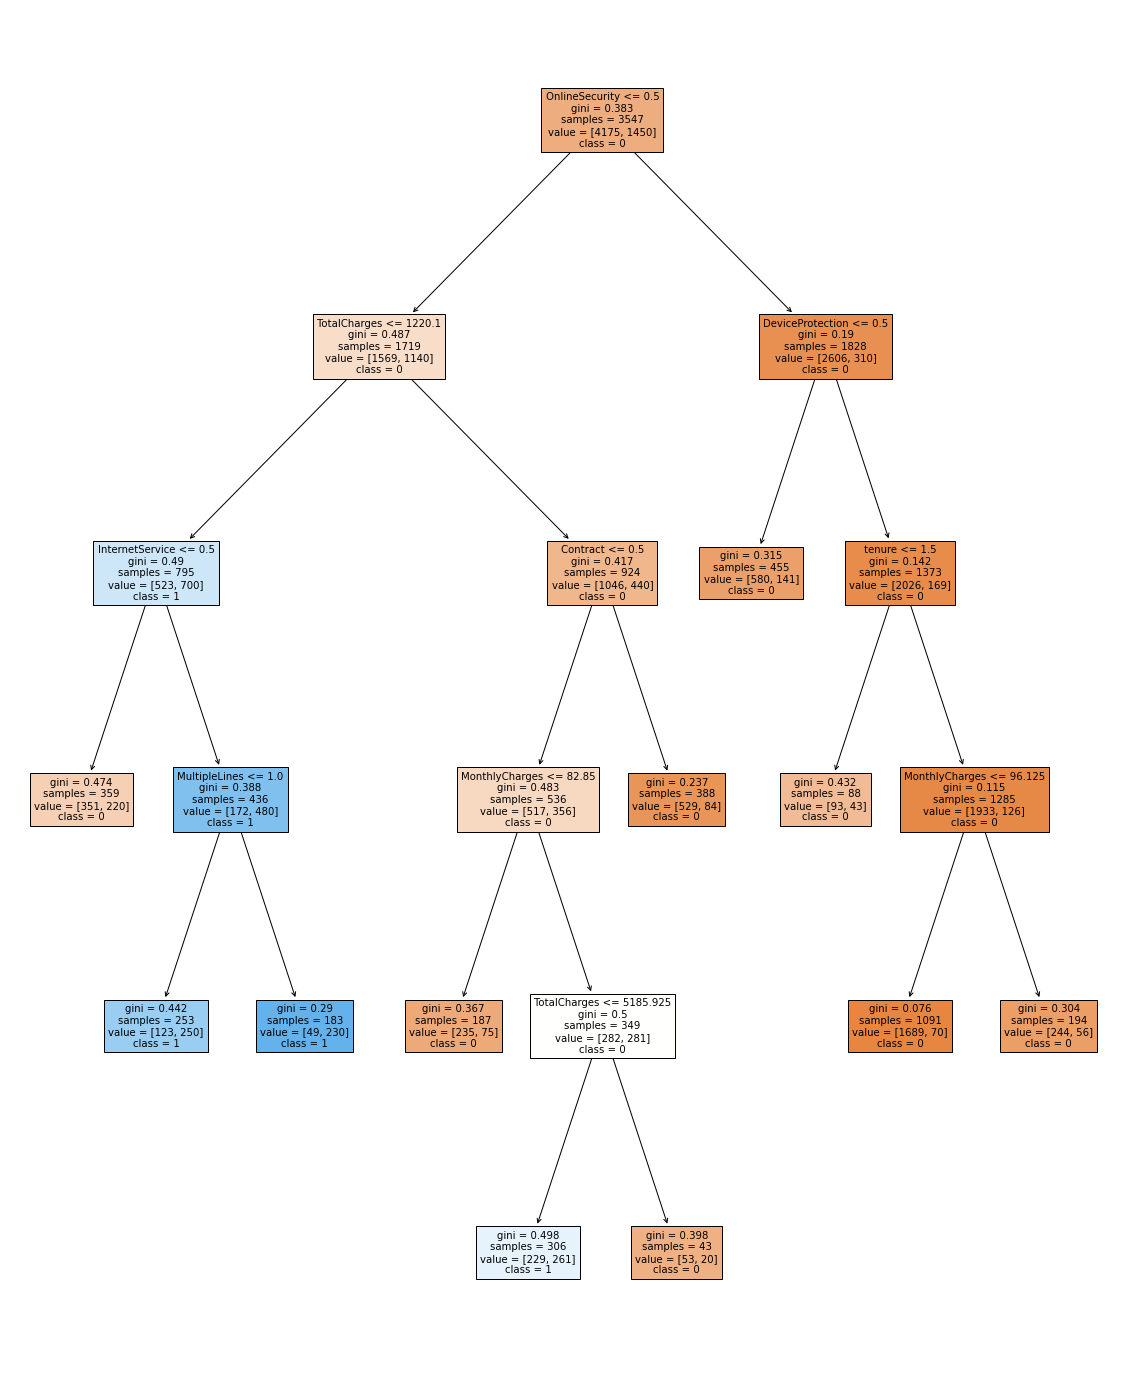

In [210]:
fig = plt.figure(figsize=(20,25))
feature_cols = list(X.columns)
tree.plot_tree(rf6.estimators_[0],
               feature_names = feature_cols, 
               class_names=['0','1'],
               filled = True);

##### Moving 30% of the instances from the original training set into the testing set. 

In [212]:
# Splitting dataset into train set and test set, 70/30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4922, 19) (4922,)
(2110, 19) (2110,)


In [213]:
rfmodel_3 = RandomForestClassifier()
rfmodel_3.fit(X_train,y_train)
rfy_pred3 = rfmodel_3.predict(X_test)
rfaccuracy3 = metrics.accuracy_score(y_test, rfy_pred3)*100
print("Accuracy : " + str(round(rfaccuracy3, 2)) + "%")

Accuracy : 78.2%


##### Moving 60% of the instances from the original training set into the testing set. 

In [217]:
# Splitting dataset into train set and test set, 40/60 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 42, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2812, 19) (2812,)
(4220, 19) (4220,)


In [218]:
rfmodel_4 = RandomForestClassifier()
rfmodel_4.fit(X_train,y_train)
rfy_pred4 = rfmodel_4.predict(X_test)
rfaccuracy4 = metrics.accuracy_score(y_test, rfy_pred4)*100
print("Accuracy : " + str(round(rfaccuracy4, 2)) + "%")

Accuracy : 79.03%


Out of all the Random Forest models, the 40/70 split model gave the best accuracy of 79.03%

When comparing the accuracies of Decision Tree and Rnadom Forest, Random Forest model peformed well. <br>
Highest accuracy Decision Tree Model -> 78.34% <br>
Highest accuracy Random Forest Model -> 79.03%

## References 

Rashida Nasrin Sucky (Aug 27, 2020). Data Binning with Pandas Cut or Qcut Method. When You Are Looking for a Range Not an Exact Value, a Grade Not a Score. https://towardsdatascience.com/sort-and-segment-your-data-into-bins-to-get-sorted-ranges-pandas-cut-and-qcut-7785931bbfde

B. Chen (Jun 18, 2020). What is One-Hot Encoding and how to use Pandas get_dummies function. A complete One-Hot Encoding tutorial for beginners. https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970

Okoh Anita (Aug 20, 2019). Seaborn Heatmaps: 13 Ways to Customize Correlation Matrix Visualizations. https://heartbeat.comet.ml/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

(05 Sep, 2020). Complement Naive Bayes (CNB) Algorithm. https://www.geeksforgeeks.org/complement-naive-bayes-cnb-algorithm/

Abhini Shetye (Feb 11, 2019). Feature Selection with sklearn and Pandas. Introduction to Feature Selection methods and their implementation in Python. https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

Mazen Ahmed (Nov 26, 2020).K-means Clustering in Python. https://python.plainenglish.io/k-means-clustering-in-python-9825a280f9cb

Prashant Banerjee. K-Means Clustering with Python. https://www.kaggle.com/prashant111/k-means-clustering-with-python

Abhishek Yadav. Kmeans clustering with Elbow Method and Silhouette https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette

Pulkit Sharma (May 27, 2019). A Beginner’s Guide to Hierarchical Clustering and how to Perform it in Python. https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

Michael Galarnyk (Dec 5, 2017). PCA using Python (scikit-learn). https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Avinash Navlani (December 28, 2018). Decision Tree Classification in Python. https://www.datacamp.com/community/tutorials/decision-tree-classification-python

Jason Brownlee (July 31, 2020). How to Configure k-Fold Cross-Validation. https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
